# Observed Data

In [2]:
import pandas as pd
pd.set_option("display.max_columns", None)


#need to locate the stations into tazs
bcycleaus4 = pd.read_csv('data/Observed-data/bcycleaus4.csv')
display(bcycleaus4)
## distance is the distance betweeen two points

,membership_type,bike_type,st_date,st_time,end_time,end_date,st_dt,end_dt,st_stn,st_stn_name,end_stn,end_stn_name,dur_sec2,dur_min,bike,type,st_stn_lat,st_stn_lon,st_tract,end_stn_lat,end_stn_lon,end_tract,dist,repo_window,repo_min,repo_hr,reposition,weekend,mph,dur_hr,st_tract2,end_tract2
0,24-Hour Kiosk (Austin B-cycle),NaN,1/08/2014,23:12:00,23:12:00,1/08/2014,1/08/2014 23:12:00,1/08/2014 23:12:00,2498.0,Convention Center / 4th St. @ MetroRail,2498.0,Convention Center / 4th St. @ MetroRail,0.0,0.0,NaN,DAY,30.26483,-97.73900,4.845300e+10,30.26483,-97.73900,4.845300e+10,0.000000,NaN,NaN,NaN,NaN,0,NaN,0.000000,1103.0,1103.0
1,24-Hour Kiosk (Austin B-cycle),NaN,3/06/2014,11:12:00,11:53:00,3/06/2014,3/06/2014 11:12:00,3/06/2014 11:53:00,2498.0,Convention Center / 4th St. @ MetroRail,2571.0,Red River & 8th Street,2460.0,41.0,NaN,DAY,30.26483,-97.73900,4.845300e+10,30.26854,-97.73646,4.845300e+10,0.297861,NaN,NaN,NaN,NaN,0,0.435894,0.683333,1103.0,1101.0
2,24-Hour Kiosk (Austin B-cycle),NaN,3/07/2014,11:12:00,11:13:00,3/07/2014,3/07/2014 11:12:00,3/07/2014 11:13:00,2542.0,Plaza Saltillo,2542.0,Plaza Saltillo,60.0,1.0,NaN,DAY,30.26217,-97.72743,4.845300e+10,30.26217,-97.72743,4.845300e+10,0.000000,NaN,NaN,NaN,NaN,0,0.000000,0.016667,902.0,902.0
3,24-Hour Kiosk (Austin B-cycle),NaN,3/07/2014,13:12:00,13:23:00,3/07/2014,3/07/2014 13:12:00,3/07/2014 13:23:00,2571.0,Red River & 8th Street,2501.0,5th & Bowie,660.0,11.0,NaN,DAY,30.26854,-97.73646,4.845300e+10,30.26960,-97.75332,4.845300e+10,1.008976,NaN,NaN,NaN,NaN,0,5.503506,0.183333,1101.0,1200.0
4,24-Hour Kiosk (Austin B-cycle),NaN,3/07/2014,16:12:00,16:12:00,3/07/2014,3/07/2014 16:12:00,3/07/2014 16:12:00,2498.0,Convention Center / 4th St. @ MetroRail,2498.0,Convention Center / 4th St. @ MetroRail,0.0,0.0,NaN,DAY,30.26483,-97.73900,4.845300e+10,30.26483,-97.73900,4.845300e+10,0.000000,NaN,NaN,NaN,NaN,0,NaN,0.000000,1103.0,1103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629188,Local31,NaN,7/23/2021,13:07:22,13:40:22,7/23/2021,7/23/2021 13:07:22,7/23/2021 13:40:22,3792.0,22nd/Pearl,3792.0,22nd/Pearl,1980.0,33.0,21903.0,MNTH,30.28530,-97.74670,4.845300e+10,30.28530,-97.74670,4.845300e+10,0.000000,NaN,NaN,NaN,NaN,0,0.000000,0.550000,607.0,607.0
1629189,Student Membership,NaN,7/23/2021,17:10:55,17:16:55,7/23/2021,7/23/2021 17:10:55,7/23/2021 17:16:55,3792.0,22nd/Pearl,2548.0,Guadalupe/West Mall @ University Co-op,360.0,6.0,21903.0,STUD,30.28530,-97.74670,4.845300e+10,30.28576,-97.74181,4.845300e+10,0.293544,NaN,NaN,NaN,NaN,0,2.935442,0.100000,607.0,608.0
1629190,U.T. Student Membership,NaN,7/23/2021,17:58:15,18:02:15,7/23/2021,7/23/2021 17:58:15,7/23/2021 18:02:15,2548.0,Guadalupe/West Mall @ University Co-op,3793.0,28th/Rio Grande,240.0,4.0,21903.0,STUD,30.28576,-97.74181,4.845300e+10,30.29333,-97.74412,4.845300e+10,0.541005,NaN,NaN,NaN,NaN,0,8.115068,0.066667,608.0,606.0
1629191,Student Membership,NaN,7/24/2021,19:38:58,19:43:58,7/24/2021,7/24/2021 19:38:58,7/24/2021 19:43:58,3793.0,28th/Rio Grande,3792.0,22nd/Pearl,300.0,5.0,21903.0,STUD,30.29333,-97.74412,4.845300e+10,30.28530,-97.74670,4.845300e+10,0.575899,NaN,NaN,NaN,NaN,1,6.910788,0.083333,606.0,607.0


,bike
ST_YEAR,
2013,134.428571
2014,456.812261
2015,547.885057
2016,601.642202
2017,516.215385
2018,1117.448276
2019,249.042146
2020,245.557252
2021,449.304636


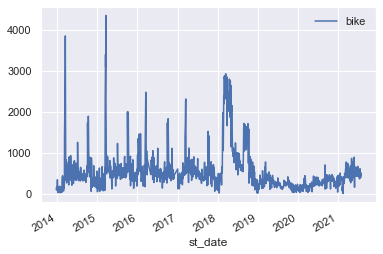

In [39]:
data = pd.read_csv('data/bcycleaus4.csv')
data = data[data['weekend'] == 0]
# Aggregation over daily rides
agg_data = data.groupby('st_date').agg({'bike': 'count'})
agg_data = agg_data.reset_index(drop=False)
agg_data.st_date = pd.to_datetime(agg_data.st_date)
agg_data.plot(x='st_date', y='bike')
# Agg: annual mean daily ride
agg_data['ST_YEAR'] = agg_data.st_date.dt.year
display(agg_data.groupby('ST_YEAR').mean())

# there are some big shrinks in 2019

<AxesSubplot:>

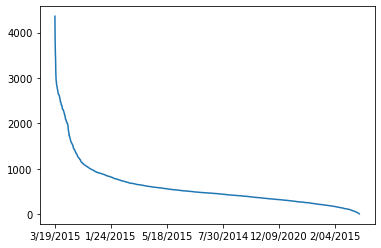

In [14]:
bcycleaus4['st_date'].value_counts().plot()

In [13]:
bcycleaus4[bcycleaus4['st_date'].str.endswith('2019')]

,membership_type,bike_type,st_date,st_time,end_time,end_date,st_dt,end_dt,st_stn,st_stn_name,end_stn,end_stn_name,dur_sec2,dur_min,bike,type,st_stn_lat,st_stn_lon,st_tract,end_stn_lat,end_stn_lon,end_tract,dist,repo_window,repo_min,repo_hr,reposition,weekend,mph,dur_hr,st_tract2,end_tract2
9687,Local30,NaN,1/01/2019,00:08:41,00:21:41,1/01/2019,1/01/2019 00:08:41,1/01/2019 00:21:41,2575.0,Riverside @ S. Lamar,3790.0,Lake Austin Blvd @ Deep Eddy,780.0,13.0,NaN,MNTH,30.26446,-97.75665,4.845300e+10,30.27807,-97.77272,4.845300e+10,1.343356,NaN,NaN,NaN,NaN,0,6.200102,0.216667,1309.0,1602.0
9688,U.T. Student Membership,NaN,1/01/2019,00:14:45,00:27:45,1/01/2019,1/01/2019 00:14:45,1/01/2019 00:27:45,3390.0,Brazos & 6th,4050.0,5th & Campbell,780.0,13.0,NaN,STUD,30.26754,-97.74154,4.845300e+10,30.27489,-97.76483,4.845300e+10,1.479964,NaN,NaN,NaN,NaN,0,6.830603,0.216667,1103.0,1200.0
9689,Local365,NaN,1/01/2019,01:06:08,01:10:08,1/01/2019,1/01/2019 01:06:08,1/01/2019 01:10:08,4050.0,5th & Campbell,2552.0,3rd & West,240.0,4.0,NaN,YEAR,30.27489,-97.76483,4.845300e+10,30.26780,-97.75189,4.845300e+10,0.914638,NaN,NaN,NaN,NaN,0,13.719566,0.066667,1200.0,1200.0
9690,Single Trip,NaN,1/01/2019,01:42:57,01:59:57,1/01/2019,1/01/2019 01:42:57,1/01/2019 01:59:57,2552.0,3rd & West,3292.0,East 4th & Chicon,1020.0,17.0,NaN,TRIP,30.26780,-97.75189,4.845300e+10,30.25987,-97.72373,4.845300e+10,1.767943,NaN,NaN,NaN,NaN,0,6.239799,0.283333,1200.0,902.0
9691,24 Hour Walk Up Pass,NaN,1/01/2019,01:52:15,01:52:15,1/01/2019,1/01/2019 01:52:15,1/01/2019 01:52:15,3390.0,Brazos & 6th,3390.0,Brazos & 6th,0.0,0.0,NaN,DAY,30.26754,-97.74154,4.845300e+10,30.26754,-97.74154,4.845300e+10,0.000000,NaN,NaN,NaN,NaN,0,NaN,0.000000,1103.0,1103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471542,24 Hour Walk Up Pass,NaN,12/06/2019,11:24:44,11:35:44,12/06/2019,12/06/2019 11:24:44,12/06/2019 11:35:44,3513.0,South Congress/Barton Springs @ The Austin Ame...,3513.0,South Congress/Barton Springs @ The Austin Ame...,660.0,11.0,14264.0,DAY,30.25839,-97.74592,4.845300e+10,30.25839,-97.74592,4.845300e+10,0.000083,NaN,NaN,NaN,NaN,0,0.000455,0.183333,1401.0,1401.0
1471543,24 Hour Walk Up Pass,NaN,12/06/2019,11:38:58,13:36:58,12/06/2019,12/06/2019 11:38:58,12/06/2019 13:36:58,3513.0,South Congress/Barton Springs @ The Austin Ame...,2575.0,Riverside/South Lamar,7080.0,118.0,14264.0,DAY,30.25839,-97.74592,4.845300e+10,30.26446,-97.75665,4.845300e+10,0.765631,NaN,NaN,NaN,NaN,0,0.389304,1.966667,1401.0,1309.0
1471544,24 Hour Walk Up Pass,NaN,12/06/2019,15:51:46,16:09:46,12/06/2019,12/06/2019 15:51:46,12/06/2019 16:09:46,2575.0,Riverside/South Lamar,2499.0,2nd/Lavaca @ City Hall,1080.0,18.0,14264.0,DAY,30.26446,-97.75665,4.845300e+10,30.26476,-97.74678,4.845300e+10,0.589497,NaN,NaN,NaN,NaN,0,1.964989,0.300000,1309.0,1102.0
1471545,Explorer,NaN,12/06/2019,16:09:46,15:16:26,12/23/2019,12/06/2019 16:09:46,12/23/2019 15:16:26,2499.0,11th/Salina,4055.0,11th/Salina,NaN,NaN,14264.0,Repo,30.26476,-97.74678,4.845300e+10,30.26638,-97.72140,4.845300e+10,1.519027,1465600.0,24426.666667,407.111111,1.0,0,NaN,NaN,1102.0,804.0


already did one run for the dockless

In [6]:
docklessausb4 = pd.read_csv('data/docklessausb4.csv')
##display(docklessausb4)

,id,vehicle_type,dur_sec,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district__start_,council_district__end_,year,st_dt,end_dt,st_date,end_date,st_time,dur_min,dist,weekend,dur_sec2,dur_min2,bike,st_id,end_id,r_st_id,r_end_id,r_st_dt,r_end_dt,repo_window,repo_min,repo_hr,reposition,mph,st_tract2,end_tract2
0,9b673216-df14-45c1-be7c-97c9fe46fde7,scooter,1241,2869.0,11/10/2018 20:00:00,14:15:00,4/17/2019 07:11:34,11,20,5,9.0,9.0,2018,11/10/2018 14:00:00,11/10/2018 14:15:00,11/10/2018,11/10/2018,14:00:00,20.683333,1.783095,1,900.0,15.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.172556,604.0,601.0
1,9ce8b54b-5783-41be-b856-b2c522cc5994,scooter,2466,6222.0,11/10/2018 22:45:00,17:30:00,4/17/2019 06:02:36,11,23,5,9.0,9.0,2018,11/10/2018 16:45:00,11/10/2018 17:30:00,11/10/2018,11/10/2018,16:45:00,41.100000,3.866998,1,2700.0,45.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.645253,601.0,601.0
2,a9ea9a0c-83e2-49f9-83ea-1177cc807f5c,scooter,506,870.0,11/11/2018 01:30:00,19:30:00,4/17/2019 02:16:04,11,1,6,9.0,9.0,2018,11/10/2018 19:30:00,11/10/2018 19:30:00,11/10/2018,11/10/2018,19:30:00,8.433333,0.540709,1,0.0,0.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.846938,601.0,601.0
3,fb7f73b2-8c5f-465e-9cbe-806e9af77969,scooter,270,450.0,11/11/2018 18:00:00,12:00:00,4/17/2019 02:40:56,11,18,6,9.0,9.0,2018,11/10/2018 19:30:00,11/11/2018 12:00:00,11/11/2018,11/11/2018,12:00:00,NaN,0.279677,1,NaN,0.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,4.845300e+10,4.845300e+10,1.857497e+09,1.857557e+09,59400.0,990.0,16.50,1.0,3.729024,601.0,1100.0
4,fb7f73b2-8c5f-465e-9cbe-806e9af77969,scooter,270,450.0,11/11/2018 18:00:00,12:00:00,4/17/2019 02:40:56,11,18,6,9.0,9.0,2018,11/11/2018 12:00:00,11/11/2018 12:00:00,11/11/2018,11/11/2018,12:00:00,4.500000,0.279677,1,0.0,0.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.729024,1100.0,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16941526,252254f0-c902-4492-ac90-15012207e433,scooter,310,1000.0,10/22/2018 23:30:00,18:45:00,4/17/2019 06:06:51,10,23,0,3.0,3.0,2018,10/22/2018 18:30:00,10/22/2018 18:45:00,10/22/2018,10/22/2018,18:30:00,5.166667,0.621504,0,900.0,15.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.217466,902.0,902.0
16941527,a8f4f202-7782-4b1f-89c1-73e35501c33d,scooter,1861,6200.0,10/23/2018 14:45:00,10:15:00,4/17/2019 02:43:25,10,15,1,3.0,3.0,2018,10/22/2018 18:45:00,10/23/2018 09:45:00,10/23/2018,10/23/2018,09:45:00,NaN,3.853325,0,NaN,30.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,4.845300e+10,4.845300e+10,1.855853e+09,1.855907e+09,54000.0,900.0,15.00,1.0,7.454041,902.0,2111.0
16941528,a8f4f202-7782-4b1f-89c1-73e35501c33d,scooter,1861,6200.0,10/23/2018 14:45:00,10:15:00,4/17/2019 02:43:25,10,15,1,3.0,3.0,2018,10/23/2018 09:45:00,10/23/2018 10:15:00,10/23/2018,10/23/2018,09:45:00,31.016667,3.853325,0,1800.0,30.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.454041,2111.0,902.0
16941529,a32bec49-dfde-4539-ab92-e9321beaecd0,scooter,455,1400.0,10/24/2018 17:00:00,12:15:00,4/17/2019 04:18:53,10,17,2,9.0,1.0,2018,10/23/2018 10:15:00,10/24/2018 12:00:00,10/24/2018,10/24/2018,12:00:00,NaN,0.870106,0,NaN,15.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,4.845300e+10,4.845300e+10,1.855909e+09,1.856002e+09,92700.0,1545.0,25.75,1.0,6.884352,902.0,402.0


In [ ]:
docklessausb4['vehicle_type']

,bike
ST_YEAR,
2018,12020.050279
2019,18448.333333
2020,5309.209924
2021,9745.325688


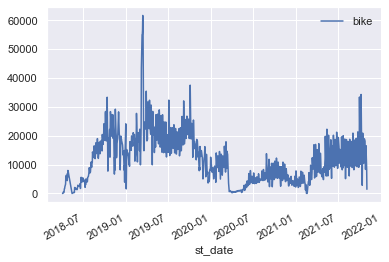

In [38]:
# distance and duration are based on actual distance
# 15% of the scooter is less than 1/10 of a mile
# gps slightly changes, measurement error? look at the time.

data = pd.read_csv('data/docklessausb4.csv')
data = data[data['weekend'] == 0]
# Aggregation over daily rides
agg_data = data.groupby('st_date').agg({'bike': 'count'})
agg_data = agg_data.reset_index(drop=False)
agg_data.st_date = pd.to_datetime(agg_data.st_date)
agg_data.plot(x='st_date', y='bike')
# Agg: annual mean daily ride
agg_data['ST_YEAR'] = agg_data.st_date.dt.year
display(agg_data.groupby('ST_YEAR').mean())

## need to try to choose the best year or best month

<AxesSubplot:>

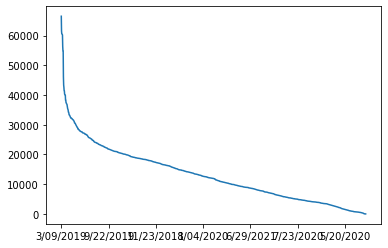

In [15]:
docklessausb4['st_date'].value_counts().plot()

In [16]:
tazs = pd.read_csv('data/taz-centers.csv.gz')

In [17]:
tazs

,taz,coord-x,coord-y,area
0,4849100000123,2.965472e+06,3.664299e+06,0.000069
1,4845300000055,2.956926e+06,3.631039e+06,0.000444
2,4845300001536,2.947914e+06,3.635487e+06,0.000394
3,4802100001207,3.006428e+06,3.645482e+06,0.002449
4,4820900000708,2.959828e+06,3.585137e+06,0.000045
...,...,...,...,...
1928,4849100001319,2.967513e+06,3.658600e+06,0.000072
1929,4849100000653,2.990894e+06,3.680021e+06,0.000155
1930,4845300001420,2.959100e+06,3.625294e+06,0.000186
1931,4802100001849,3.013560e+06,3.636939e+06,0.000382


In [22]:
tazs.to_csv('out/tazs.csv')

# NetWork Exploring -- sfbay tho

### An example using pyrosm to analyse sfbay network

In [5]:
# Import the library
import pyrosm
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Print information about the basic usage of the `OSM` reader object
help(pyrosm.OSM.__init__)
# Initialize the OSM object
fp = 'data/sf-bay.osm.pbf'
osm = pyrosm.OSM(fp)
# See the type
print("Type of 'osm' instance: ", type(osm))

Help on function __init__ in module pyrosm.pyrosm:

__init__(self, filepath, bounding_box=None)
    Initialize self.  See help(type(self)) for accurate signature.

Type of 'osm' instance:  <class 'pyrosm.pyrosm.OSM'>


<AxesSubplot:>

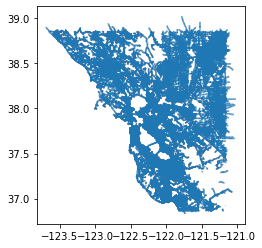

In [27]:
# Read all drivable roads
# =======================
drive_net = osm.get_network(network_type="driving")
drive_net.plot()

The network contains various information that is parsed from the OSM data, and includes length column that contains information about the length of the road in meters.
Each way in the network is represented as a MultiLineString geometry constructed from multiple road segments. This is how the data is represented by default in OSM. However, this differs if reading nodes and edges: in that case each road segment is represented as a separate row in data (to improve connectivity)

In [34]:
display(drive_net.head(2))
display(drive_net.columns)

,access,area,bicycle,bridge,busway,cycleway,est_width,foot,footway,highway,...,tunnel,turn,width,id,timestamp,version,tags,osm_type,geometry,length
0,None,None,None,yes,None,None,None,None,None,secondary_link,...,None,None,None,4304424,1471846629,13,"{""layer"":""1""}",way,"MULTILINESTRING ((-122.04703 37.38676, -122.04...",80.0
1,None,None,None,None,None,None,None,None,None,service,...,None,None,None,4307859,1379664394,6,None,way,"MULTILINESTRING ((-122.01816 37.35825, -122.01...",219.0


Index(['access', 'area', 'bicycle', 'bridge', 'busway', 'cycleway',
       'est_width', 'foot', 'footway', 'highway', 'junction', 'lanes', 'lit',
       'maxspeed', 'motorcar', 'motorroad', 'motor_vehicle', 'name', 'oneway',
       'overtaking', 'passing_places', 'psv', 'ref', 'service', 'segregated',
       'sidewalk', 'smoothness', 'surface', 'tracktype', 'tunnel', 'turn',
       'width', 'id', 'timestamp', 'version', 'tags', 'osm_type', 'geometry',
       'length'],
      dtype='object')

I'm thinking about we may could have some way of checking the connections between different roads, several important things here:

1. Road classification
2. Road connectivity

some usefule links:

A very comprehensive description of the validation of the network from OSM: https://wiki.openstreetmap.org/wiki/Tasking_Manager/Validating_data

A demo of network validation:
https://www.youtube.com/watch?v=2h12CKnvK38&t=38s

# Output Events

dockless_bike_trips

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [4]:
def calculate_bike_trips(filename):
    data = pd.read_csv('data/' + filename)
    data = data[data['time'] <= 86400]
    data = data[data['type'] == 'PathTraversal']
    data = data[data['mode'] == 'bike']
    data = data['vehicleType'].str.startswith('shared')
    shared_bike_trips = len(data)
    print(filename, "shared_bike_trips:", shared_bike_trips)

    del data

In [5]:
calculate_bike_trips('0.2pop.gz')

0.2pop.gz shared_bike_trips: 11301


In [6]:
## maybe try docked and dockless seperately and then combine them together

## Hourly Ride Distribution issues

In [17]:
def Ride_Rate_Distribution(filename, i):
    data = pd.read_csv('data/Several-ITER-Runs/' + filename)
    data['Hour of day'] = data['time']
    data['Hour of day'] = data['Hour of day'] / 3600
    data = data.reset_index(drop=True)
    data = data[data['type'] == 'PathTraversal']
    data = data[data['mode'] == 'bike']
    data = data[data['time'] / 3600 <= 24]
    data = data.reset_index()
    data['Hour of day'] = data['Hour of day'].astype(int)
    data = data[data['vehicleType'].str.startswith('shared')]
    frequency_df = data.groupby('Hour of day').count()
    frequency_df['counts'] = frequency_df['secondaryFuelLevel']
    frequency_df['counts'] = frequency_df['counts']
    frequency_df['counts'].sum()
    frequency_df['rate'] = frequency_df['counts'] / frequency_df['counts'].sum()
    
    sns.lineplot(data=frequency_df, x = 'Hour of day', y="rate")
    ax = sns.lineplot(data=frequency_df, x = 'Hour of day', y="rate")
    plt.title(filename + ' :hourly_rides_distribution')
    plt.savefig('out' + str(i) + 'hourly_rides_distribution.png')
    plt.show()

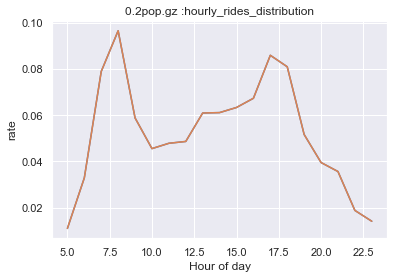

In [9]:
Ride_Rate_Distribution('0.2pop.gz', 1)

In [6]:
import geopandas as gpd
from geopandas.tools import sjoin
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
%matplotlib inline
import pandas as pd
from pyproj import CRS
from pyproj import Transformer
import seaborn as sns
sns.set(style="darkgrid")
import scipy as sp
import time
import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [7]:
def Ride_Rate_Distribution_shared(filename):
    data = pd.read_csv('data/Several-ITER-Runs/' + filename)
    
    data['Hour of day'] = data['time']
    data['Hour of day'] = data['Hour of day'] / 3600
    data = data.reset_index(drop=True)
    data = data[data['type'] == 'PathTraversal']
    data = data[data['mode'] == 'bike']
    data = data[data['time'] / 3600 <= 24]
    data = data.reset_index()
    data['Hour of day'] = data['Hour of day'].astype(int)
    data = data[data['vehicle'].str.startswith('sharedVehicle')]
    frequency_df = data.groupby('Hour of day').count()
    frequency_df['counts'] = frequency_df['secondaryFuelLevel']
    frequency_df['counts'] = frequency_df['counts']
    frequency_df['counts'].sum()
    frequency_df['rate'] = frequency_df['counts'] / frequency_df['counts'].sum()
    
    sns.lineplot(data=frequency_df, x = 'Hour of day', y="rate")
    ax = sns.lineplot(data=frequency_df, x = 'Hour of day', y="rate")
    plt.title('Student ' + ' :hourly_rides_distribution')
    plt.savefig('out/' + filename + '  hourly_rides_distribution.png')
    plt.show()

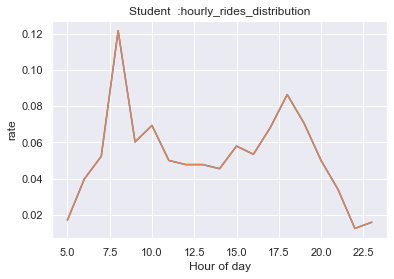

In [8]:
Ride_Rate_Distribution_shared('student.gz')

In [9]:
for i in range(1,3):
    Ride_Rate_Distribution('1.events ' + str(i) + '.csv.gz', i)

NameError: name 'Ride_Rate_Distribution' is not defined

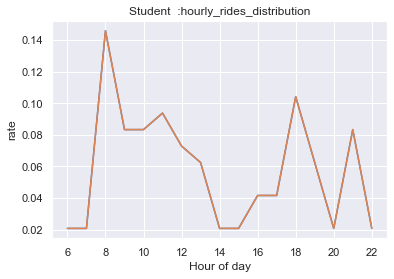

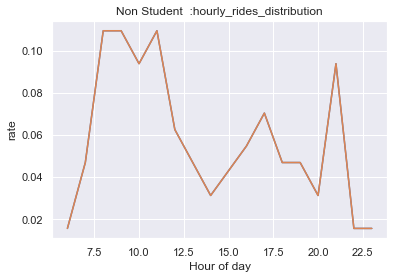

In [28]:
for i in range(1,3):
    Ride_Rate_Distribution_shared('1.events ' + str(i) + '.csv.gz', i)

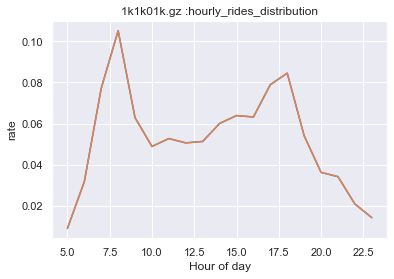

In [18]:
Ride_Rate_Distribution('1k1k01k.gz', 1)

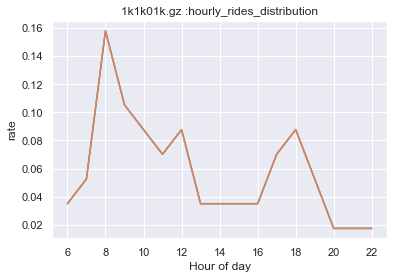

In [12]:
Ride_Rate_Distribution_shared('1k1k01k.gz', 1)

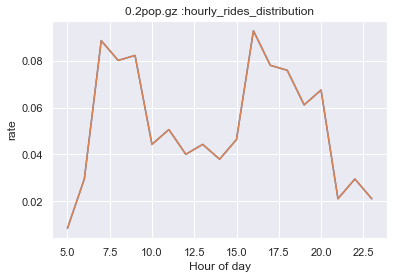

In [19]:
Ride_Rate_Distribution_shared('0.2pop.gz', 1)

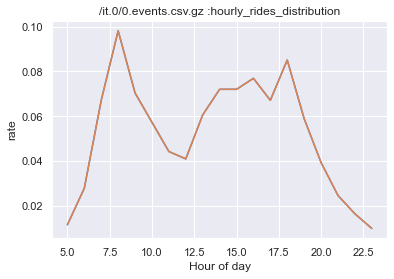

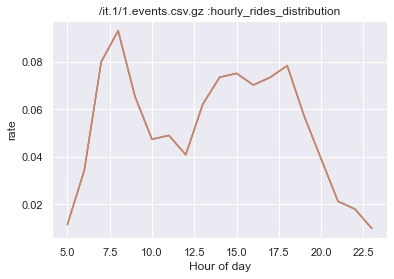

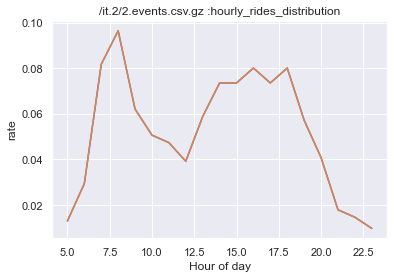

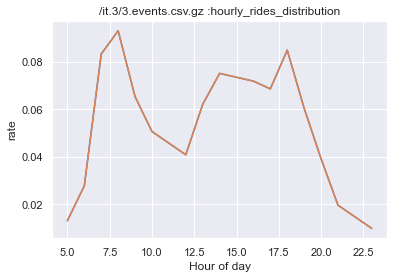

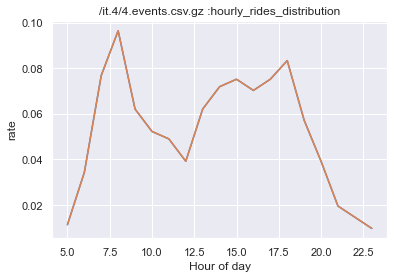

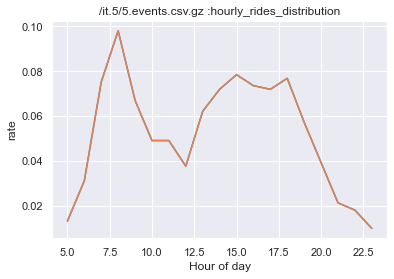

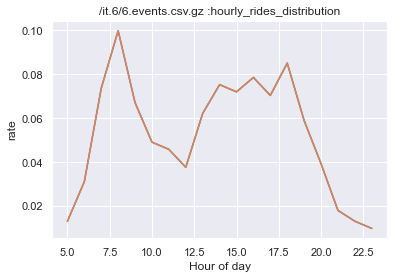

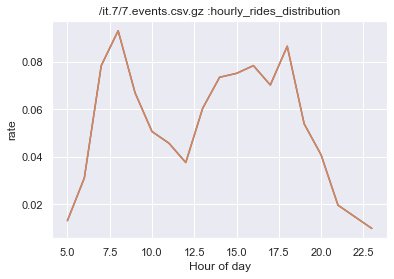

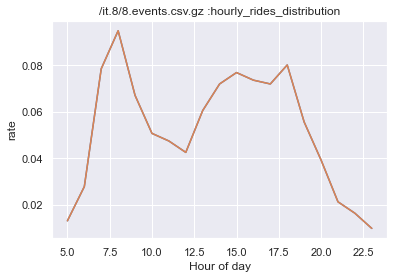

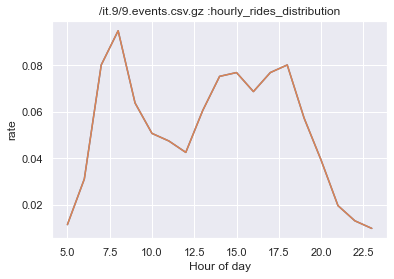

In [13]:
for i in range(0, 10):
    Ride_Rate_Distribution('/it.' + str(i) + '/' + str(i) + '.events.csv.gz', i)

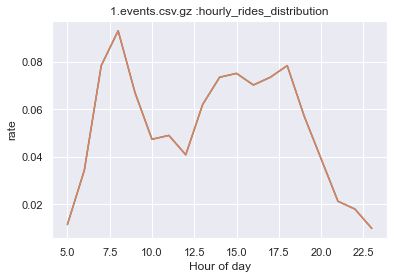

In [21]:
Ride_Rate_Distribution('1.events.csv.gz')

## Vehicle Types issues

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

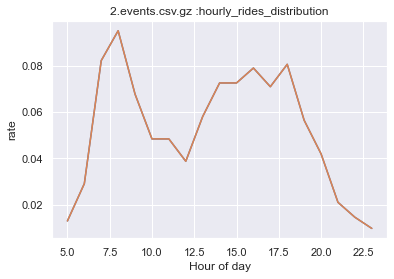

In [10]:
Ride_Rate_Distribution('2.events.csv.gz', 1)

In [ ]:
data = pd.read_csv('data/Ride_Rate_Distribution')
pathTraversal = data[data['type'] == 'PathTraversal']
pathTraversal[pathTraversal['mode'] == 'bike']
pd.set_option("display.max_columns", None)
pathTraversal = pathTraversal.dropna(how='all', axis=1)
pathTraversal = pathTraversal[pathTraversal['mode'] == 'bike']
display(pathTraversal.vehicleType.unique())
display(pathTraversal.vehicle.unique())

In [4]:
pathTraversal[pathTraversal['vehicle'].str.startswith('sharedVehicle')]

,startX,startY,endX,endY,time,type,primaryFuelLevel,secondaryFuelLevel,vehicle,arrivalTime,departureTime,currentTourMode,numPassengers,links,vehicleType,primaryFuel,length,mode,riders,toStopIndex,tollPaid,secondaryFuel,driver,fromStopIndex,seatingCapacity,capacity,linkTravelTime,secondaryFuelType,primaryFuelType
455391,-97.741092,30.260194,-97.752630,30.269381,27490.0,PathTraversal,2210000.0,0.0,sharedVehicle-austinBike-173,27490.0,27156.0,bike,0.0,"191153,191152,191143,237332,237334,237336,2373...",sharedVehicle-austinBike,0.0,1907.146,bike,NaN,NaN,0.0,0.0,1018498,NaN,2.0,2.0,"8.0,8.0,10.0,3.0,57.0,19.0,4.0,22.0,38.0,4.0,7...",None,Gasoline
458405,-97.752630,30.269381,-97.751473,30.268407,27522.0,PathTraversal,2210000.0,0.0,sharedVehicle-austinBike-173,27522.0,27490.0,bike,0.0,"160966,160967",sharedVehicle-austinBike,0.0,189.341,bike,NaN,NaN,0.0,0.0,1018498,NaN,2.0,2.0,"32.0,32.0",None,Gasoline
757852,-97.751473,30.268407,-97.760972,30.274172,33035.0,PathTraversal,2210000.0,0.0,sharedVehicle-austinBike-173,33035.0,32828.0,bike,0.0,"160966,228462,228464,228466,260554,260556,3043...",sharedVehicle-austinBike,0.0,1185.819,bike,NaN,NaN,0.0,0.0,1018498,NaN,2.0,2.0,"32.0,4.0,3.0,2.0,10.0,12.0,2.0,2.0,8.0,9.0,2.0...",None,Gasoline
764508,-97.761976,30.274552,-97.758350,30.275161,33158.0,PathTraversal,2210000.0,0.0,sharedVehicle-austinBike-173,33158.0,33035.0,bike,0.0,"170381,82874,92605,189294,189296,104109,104107...",sharedVehicle-austinBike,0.0,719.200,bike,NaN,NaN,0.0,0.0,1018498,NaN,2.0,2.0,"8.0,17.0,10.0,27.0,15.0,14.0,18.0,22.0",None,Gasoline
881746,-97.760175,30.273981,-97.750624,30.278382,35641.0,PathTraversal,2210000.0,0.0,sharedVehicle-austinBike-173,35641.0,35436.0,bike,0.0,"356412,104107,104105,104103,104101,60774,60776...",sharedVehicle-austinBike,0.0,1162.055,bike,NaN,NaN,0.0,0.0,1018498,NaN,2.0,2.0,"54.0,18.0,13.0,11.0,13.0,15.0,12.0,10.0,19.0,1...",None,Gasoline
885321,-97.751731,30.278706,-97.750003,30.276898,35710.0,PathTraversal,2210000.0,0.0,sharedVehicle-austinBike-173,35710.0,35641.0,bike,0.0,"59643,264975,264946,190360,190320,239499,239497",sharedVehicle-austinBike,0.0,389.452,bike,NaN,NaN,0.0,0.0,1018498,NaN,2.0,2.0,"20.0,8.0,12.0,10.0,4.0,5.0,30.0",None,Gasoline
892363,-97.728750,30.291849,-97.745106,30.268714,35889.0,PathTraversal,2210000.0,0.0,sharedVehicle-austinBike-687,35889.0,35154.0,bike,0.0,"85294,85295,236686,240666,337218,337214,337216...",sharedVehicle-austinBike,0.0,4138.910,bike,NaN,NaN,0.0,0.0,320512,NaN,2.0,2.0,"14.0,14.0,11.0,5.0,4.0,6.0,5.0,8.0,2.0,5.0,10....",None,Gasoline
893460,-97.745106,30.268714,-97.745544,30.267896,35909.0,PathTraversal,2210000.0,0.0,sharedVehicle-austinBike-687,35909.0,35889.0,bike,0.0,"315560,315546,189271,189269",sharedVehicle-austinBike,0.0,111.453,bike,NaN,NaN,0.0,0.0,320512,NaN,2.0,2.0,"15.0,3.0,2.0,15.0",None,Gasoline
1079971,-97.746151,30.267975,-97.730107,30.292495,40037.0,PathTraversal,2210000.0,0.0,sharedVehicle-austinBike-687,40037.0,39321.0,bike,0.0,"262909,262908,229502,229504,189266,189268,1892...",sharedVehicle-austinBike,0.0,3938.336,bike,NaN,NaN,0.0,0.0,320512,NaN,2.0,2.0,"7.0,7.0,8.0,2.0,2.0,15.0,2.0,2.0,15.0,2.0,2.0,...",None,Gasoline
1081947,-97.731544,30.292081,-97.731094,30.294799,40086.0,PathTraversal,2210000.0,0.0,sharedVehicle-austinBike-687,40086.0,40037.0,bike,0.0,"240012,106873,106871,95346",sharedVehicle-austinBike,0.0,289.450,bike,NaN,NaN,0.0,0.0,320512,NaN,2.0,2.0,"18.0,2.0,17.0,30.0",None,Gasoline


In [20]:
data = pd.read_csv('data/0.2pop.gz')
pathTraversal = data[data['type'] == 'PathTraversal']
pathTraversal[pathTraversal['mode'] == 'bike']
pd.set_option("display.max_columns", None)
pathTraversal = pathTraversal.dropna(how='all', axis=1)
pathTraversal = pathTraversal[pathTraversal['mode'] == 'bike']
display(pathTraversal.vehicleType.unique())
display(pathTraversal.vehicle.unique())
pathTraversal.vehicle.str.startswith('sharedVehicle')
# mode splits -- distinct shared trips and personal trips
# are we getting shared trips? Ant tapes of trips mathced unimodal distribution? Maybe even further by trip types.
# Students may not likely to use bike in the morning

array(['sharedVehicle-sharedBike', 'sharedVehicle-austinBike'],
      dtype=object)

array(['332648', '1734084', '592752', ..., 'sharedVehicle-austinBike-509',
       '1528404', '1282968'], dtype=object)

215739      False
220506      False
223210      False
226384      False
229400      False
            ...  
17880537    False
17903977    False
17904382    False
17909190    False
17929435    False
Name: vehicle, Length: 11334, dtype: bool

In [6]:
data = pd.read_csv('data/wrs.gz')
pathTraversal = data[data['type'] == 'PathTraversal']
pathTraversal[pathTraversal['mode'] == 'bike']
pd.set_option("display.max_columns", None)
pathTraversal = pathTraversal.dropna(how='all', axis=1)
pathTraversal = pathTraversal[pathTraversal['mode'] == 'bike']
display(pathTraversal.vehicleType.unique())
display(pathTraversal.vehicle.unique())
# do we give shared bike ids to households?
# mode splits -- distinct shared trips and personal trips
# are we getting shared trips? Ant tapes of trips mathced unimodal distribution? Maybe even further by trip types.
# Students may not likely to use bike in the morning

array(['sharedVehicle-sharedBike'], dtype=object)

array(['37680', '1728345', '1373670', '660594', '1203998', '960551',
       '30341', '1062964', '1513313', '44353', '588365', '1438727',
       '1372031', '998302', '1625920', '330123', '395304', '790518',
       '1658574', '1056424', '1221952', '1809050', '205109', '1816399',
       '1116642', '1466029', '718939', '890237', '1408511', '205097',
       '744909', '399030', '450946', '411548', '1493185', '356074',
       '635922', '1735473', '1334187', '781982', '228841', '1364304',
       '735792', '449686', '785394', '597262', '138344',
       '1005946-emergency-0', '1021805', '247865', '1744952', '1287497',
       '1600651', '121269', '904694', '421030', '944631', '1532238',
       '831139', '1029341', '1748086', '1617274', '1777025', '191727',
       '261327', '1303125', '969364', '1692102', '32542', '700889',
       '253098', '882793', '234844', '1106349', '871625', '71854',
       '1117371', '53432', '1322478', '123210', '755456', '72721',
       '1035237', '504448', '1362541', '16

In [27]:
data

,person,departTime,startX,startY,endX,endY,time,type,reason,secondaryFuelLevel,chargingPointType,parkingTaz,pricingModel,locationY,parkingType,locationX,price,primaryFuelLevel,vehicle,arrivalTime,departureTime,currentTourMode,riders,toStopIndex,tollPaid,secondaryFuel,mode,vehicleType,links,numPassengers,length,primaryFuel,driver,fromStopIndex,seatingCapacity,capacity,linkTravelTime,secondaryFuelType,primaryFuelType,cost,score,link,facility,actType,legMode,shiftStatus,parkingZoneId,fuel,duration,expectedMaximumUtility,availableAlternatives,location,personalVehicleAvailable,tourIndex,incentive,tollCost,netCost
0,rideHailAgent-1264502,NaN,NaN,NaN,NaN,NaN,0.0,departure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,be_a_tnc_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rideHailAgent-717285,NaN,NaN,NaN,NaN,NaN,0.0,departure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,be_a_tnc_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,rideHailAgent-1206084,NaN,NaN,NaN,NaN,NaN,0.0,departure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,be_a_tnc_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,rideHailAgent-717285,NaN,NaN,NaN,NaN,NaN,0.0,PersonEntersVehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rideHailVehicle-717285@default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,rideHailAgent-1206084,NaN,NaN,NaN,NaN,NaN,0.0,PersonEntersVehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rideHailVehicle-1206084@default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011087,554608.0,NaN,NaN,NaN,NaN,NaN,107438.0,actstart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360582.0,NaN,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3011088,NaN,NaN,-97.747976,30.247341,-97.672241,30.566181,107673.0,PathTraversal,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986437.626,body-1340708,107673.0,79453.0,walk,NaN,NaN,0.0,0.0,walk,BODY-TYPE-DEFAULT,NaN,0.0,38943.844263,0.0,1340708,NaN,0.0,0.0,NaN,None,Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3011089,1340708.0,NaN,NaN,NaN,NaN,NaN,107673.0,PersonLeavesVehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,body-1340708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3011090,1340708.0,NaN,NaN,NaN,NaN,NaN,107673.0,arrival,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124152.0,NaN,NaN,walk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# transit poke through

In [4]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('data/15.events.csv.gz')

In [8]:
data.type.unique()

array(['departure', 'PersonEntersVehicle', 'PathTraversal', 'ModeChoice',
       'actend', 'TeleportationEvent', 'arrival', 'actstart',
       'PersonLeavesVehicle', 'LeavingParkingEvent', 'ParkingEvent',
       'PersonCost', 'ReserveRideHail', 'ChargingPlugInEvent',
       'RefuelSessionEvent', 'ChargingPlugOutEvent', 'Replanning'],
      dtype=object)

In [13]:
modeChoice = data[data['type'] == 'ModeChoice'].dropna(how="all", axis=1)

In [14]:
modeChoice

,time,type,person,currentTourMode,length,mode,availableAlternatives,location,personalVehicleAvailable,tourIndex
158605,18028.0,ModeChoice,1059229,walk,142.938000,walk,WALK,311475.0,False,1.0
158755,18046.0,ModeChoice,854692,walk,7608.990000,walk,WALK,292835.0,False,1.0
158759,18050.0,ModeChoice,1343916,hov2_teleportation,241.420000,hov2_teleportation,HOV2_TELEPORTATION,233374.0,True,1.0
158990,18090.0,ModeChoice,935412,walk,182.231000,walk,WALK,60647.0,False,1.0
159087,18032.0,ModeChoice,1390319,walk,12510.150715,walk,WALK,146108.0,False,1.0
...,...,...,...,...,...,...,...,...,...,...
3010262,111909.0,ModeChoice,381170.0,walk,8170.163000,walk,WALK,66057.0,False,2.0
3010298,114931.0,ModeChoice,158517.0,car,6750.516000,car,CAR,312352.0,True,2.0
3010317,115357.0,ModeChoice,382452.0,walk,34150.439102,walk,WALK,163352.0,False,1.0
3010330,115719.0,ModeChoice,158517.0,car,41384.113000,car,CAR,197544.0,True,2.0


In [7]:
pathTraversal = data[data['type'] == 'PathTraversal'].dropna(how="all", axis=1)

In [10]:
pathTraversal

,driver,vehicle,time,type,vehicleType,startX,startY,endX,endY,arrivalTime,...,toStopIndex,fromStopIndex,seatingCapacity,tollPaid,capacity,linkTravelTime,secondaryFuel,secondaryFuelType,primaryFuelType,mode
155290,TransitDriverAgent-capmetro:2277309_MRG_15,capmetro:2277309_MRG_15,15453.0,PathTraversal,BUS-DEFAULT,-97.690836,30.340915,-97.690030,30.340533,15453.0,...,NaN,NaN,19.0,0.0,29.0,"76.0,0.0",0.0,None,Diesel,bus
155291,TransitDriverAgent-capmetro:2277309_MRG_2,capmetro:2277309_MRG_2,15453.0,PathTraversal,BUS-DEFAULT,-97.690836,30.340915,-97.690030,30.340533,15453.0,...,NaN,NaN,19.0,0.0,29.0,"76.0,0.0",0.0,None,Diesel,bus
155292,TransitDriverAgent-capmetro:2277309_MRG_14,capmetro:2277309_MRG_14,15453.0,PathTraversal,BUS-DEFAULT,-97.690836,30.340915,-97.690030,30.340533,15453.0,...,NaN,NaN,19.0,0.0,29.0,"76.0,0.0",0.0,None,Diesel,bus
155293,TransitDriverAgent-capmetro:2277309_MRG_12,capmetro:2277309_MRG_12,15453.0,PathTraversal,BUS-DEFAULT,-97.690836,30.340915,-97.690030,30.340533,15453.0,...,NaN,NaN,19.0,0.0,29.0,"76.0,0.0",0.0,None,Diesel,bus
155294,TransitDriverAgent-capmetro:2277309_MRG_1,capmetro:2277309_MRG_1,15453.0,PathTraversal,BUS-DEFAULT,-97.690836,30.340915,-97.690030,30.340533,15453.0,...,NaN,NaN,19.0,0.0,29.0,"76.0,0.0",0.0,None,Diesel,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010413,73665,810018,148360.0,PathTraversal,cv-L1-17000-2019,-98.037604,30.805796,-98.053745,30.813957,148360.0,...,NaN,NaN,4.0,0.0,4.0,"34.0,136.0,32.0,19.0,39.0,15.0,62.0,134.0,72.0...",0.0,None,Gasoline,car_hov3
3010414,73665,810018,149079.0,PathTraversal,cv-L1-17000-2019,-98.053745,30.813957,-98.040727,30.802488,149079.0,...,NaN,NaN,4.0,0.0,4.0,"35.0,195.0,73.0,101.0,23.0,56.0,137.0,134.0",0.0,None,Gasoline,car
3010418,80393,body-80393,150080.0,PathTraversal,BODY-TYPE-DEFAULT,-97.676794,30.473809,-98.217510,30.767464,150080.0,...,NaN,NaN,0.0,0.0,0.0,NaN,0.0,None,Food,walk
3010422,73665,body-73665,150967.0,PathTraversal,BODY-TYPE-DEFAULT,-98.046947,30.791531,-98.047568,30.812330,150967.0,...,NaN,NaN,0.0,0.0,0.0,NaN,0.0,None,Food,walk


In [11]:
personEntersVehicle = data[data['type'] == 'PersonEntersVehicle'].dropna(how="all", axis=1)

In [12]:
personEntersVehicle

,vehicle,time,type,person
4,capmetro:2289549_MRG_3,0.0,PersonEntersVehicle,TransitDriverAgent-capmetro:2289549_MRG_3
5,capmetro:2279682_MRG_12,0.0,PersonEntersVehicle,TransitDriverAgent-capmetro:2279682_MRG_12
6,capmetro:2289250_MRG_12,0.0,PersonEntersVehicle,TransitDriverAgent-capmetro:2289250_MRG_12
8,capmetro:2284772_MRG_14,0.0,PersonEntersVehicle,TransitDriverAgent-capmetro:2284772_MRG_14
9,capmetro:2289378_MRG_13,0.0,PersonEntersVehicle,TransitDriverAgent-capmetro:2289378_MRG_13
...,...,...,...,...
3010338,1111879,116390.0,PersonEntersVehicle,152482.0
3010375,1702731,125540.0,PersonEntersVehicle,1417111.0
3010389,body-1417111,128414.0,PersonEntersVehicle,1417111.0
3010395,1702731,129031.0,PersonEntersVehicle,1417111.0


# Get the parking locations

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyproj import CRS
from pyproj import Transformer
import time

In [4]:
blockGroupCenters = pd.read_csv('data/blockgroup-centers.csv.gz')
display(blockGroupCenters)

,taz,coord-x,coord-y,area
0,484530014012,2.967980e+06,3.631626e+06,7.009151e+05
1,484530024071,2.964221e+06,3.618045e+06,8.918180e+06
2,484530017493,2.959765e+06,3.628174e+06,1.193896e+06
3,484530019171,2.958085e+06,3.634652e+06,1.888338e+06
4,484530024112,2.968410e+06,3.626138e+06,8.882083e+05
...,...,...,...,...
989,480539602001,2.904640e+06,3.697538e+06,4.639660e+08
990,480539602002,2.889781e+06,3.693924e+06,4.304011e+08
991,480539601001,2.923155e+06,3.705876e+06,6.276110e+08
992,480539608003,2.914112e+06,3.648258e+06,1.809559e+08


In [5]:
nb = 'data/block_groups_austin.shp'
blockGroupAustin = gpd.read_file(nb)

In [6]:
blockGroupAustin

,GEOID,STATE,COUNTY,TRACT,BLKGRP,CENTLAT,CENTLON,geometry
0,484530014012,48,453,001401,2,+30.2451069,-097.7478800,"POLYGON ((-97.75217 30.24291, -97.75191 30.243..."
1,484530024071,48,453,002407,1,+30.1415464,-097.8134396,"POLYGON ((-97.83232 30.12975, -97.83227 30.130..."
2,484530017493,48,453,001749,3,+30.2328405,-097.8327918,"POLYGON ((-97.84060 30.23364, -97.84056 30.233..."
3,484530019171,48,453,001917,1,+30.2889860,-097.8341578,"POLYGON ((-97.84306 30.28668, -97.84303 30.286..."
4,484530024112,48,453,002411,2,+30.1994992,-097.7560889,"POLYGON ((-97.76163 30.20171, -97.76089 30.202..."
...,...,...,...,...,...,...,...,...
989,480539602001,48,053,960200,1,+30.9069409,-098.1982438,"POLYGON ((-98.33925 31.03038, -98.33911 31.030..."
990,480539602002,48,053,960200,2,+30.9061264,-098.3475533,"POLYGON ((-98.45924 31.01038, -98.45874 31.011..."
991,480539601001,48,053,960100,1,+30.9389439,-098.0037029,"POLYGON ((-98.16400 31.03206, -98.16002 31.032..."
992,480539608003,48,053,960800,3,+30.4850325,-098.2187000,"POLYGON ((-98.35152 30.51719, -98.35097 30.517..."


In [40]:
data.st_tract2.unique()

array([3.06000e+02, 1.10000e+03, 2.11100e+03, 1.40100e+03, 1.20000e+03,
       5.00000e+02, 9.02000e+02, 2.04000e+02, 6.01000e+02, 1.30400e+03,
       6.04000e+02, 4.01000e+02, 8.04000e+02, 8.01000e+02, 1.00000e+03,
       1.30500e+03, 6.03000e+02, 3.02000e+02, 7.00000e+02, 2.31400e+03,
       2.30400e+03, 1.30300e+03, 9.01000e+02, 4.02000e+02, 3.05000e+02,
       2.10500e+03, 8.03000e+02, 1.70700e+03,         nan, 1.60500e+03,
       1.91100e+03, 1.84900e+03, 1.75300e+03, 1.30700e+03, 1.30800e+03,
       3.07000e+02, 2.31600e+03, 2.30800e+03, 2.40300e+03, 1.90100e+03,
       1.60200e+03, 2.00500e+03, 2.00300e+03, 1.50100e+03, 1.75200e+03,
       1.50500e+03, 1.50400e+03, 3.04000e+02, 2.03000e+02, 1.60300e+03,
       1.60600e+03, 1.40200e+03, 2.31200e+03, 8.02000e+02, 2.10900e+03,
       1.84400e+03, 1.40300e+03, 2.31300e+03, 2.00400e+03, 2.30700e+03,
       1.71200e+03, 2.05000e+02, 1.73800e+03, 1.80400e+03, 1.50300e+03,
       1.80500e+03, 2.06000e+02, 2.31800e+03, 2.40200e+03, 1.817

In [39]:
blockGroupAustin.TRACT.unique()

array(['001401', '002407', '001749', '001917', '002411', '002003',
       '000204', '000304', '000604', '001782', '000500', '001714',
       '001716', '001785', '001755', '001772', '001775', '001770',
       '001738', '001776', '001501', '001503', '000203', '000305',
       '000302', '000307', '000801', '001307', '001505', '001812',
       '001817', '001779', '001722', '001839', '000804', '000902',
       '001000', '000901', '001304', '001751', '000402', '001718',
       '001719', '001728', '001729', '001841', '001818', '000205',
       '001910', '001813', '001913', '002201', '001912', '001747',
       '001748', '002004', '002005', '002315', '002316', '002424',
       '002423', '002421', '001918', '002211', '002207', '002209',
       '002210', '002319', '002435', '001774', '002430', '001860',
       '002314', '001504', '002409', '000206', '002304', '001780',
       '001745', '001846', '001100', '001840', '001750', '001824',
       '001746', '001845', '001804', '001805', '001806', '0017

In [7]:
blockGroupAustinAnalysis = blockGroupAustin[['GEOID', 'geometry', 'TRACT']]

In [8]:
blockGroupAustinAnalysis['area'] = blockGroupAustinAnalysis['geometry'].to_crs({'init' : 'epsg:4326'}).area

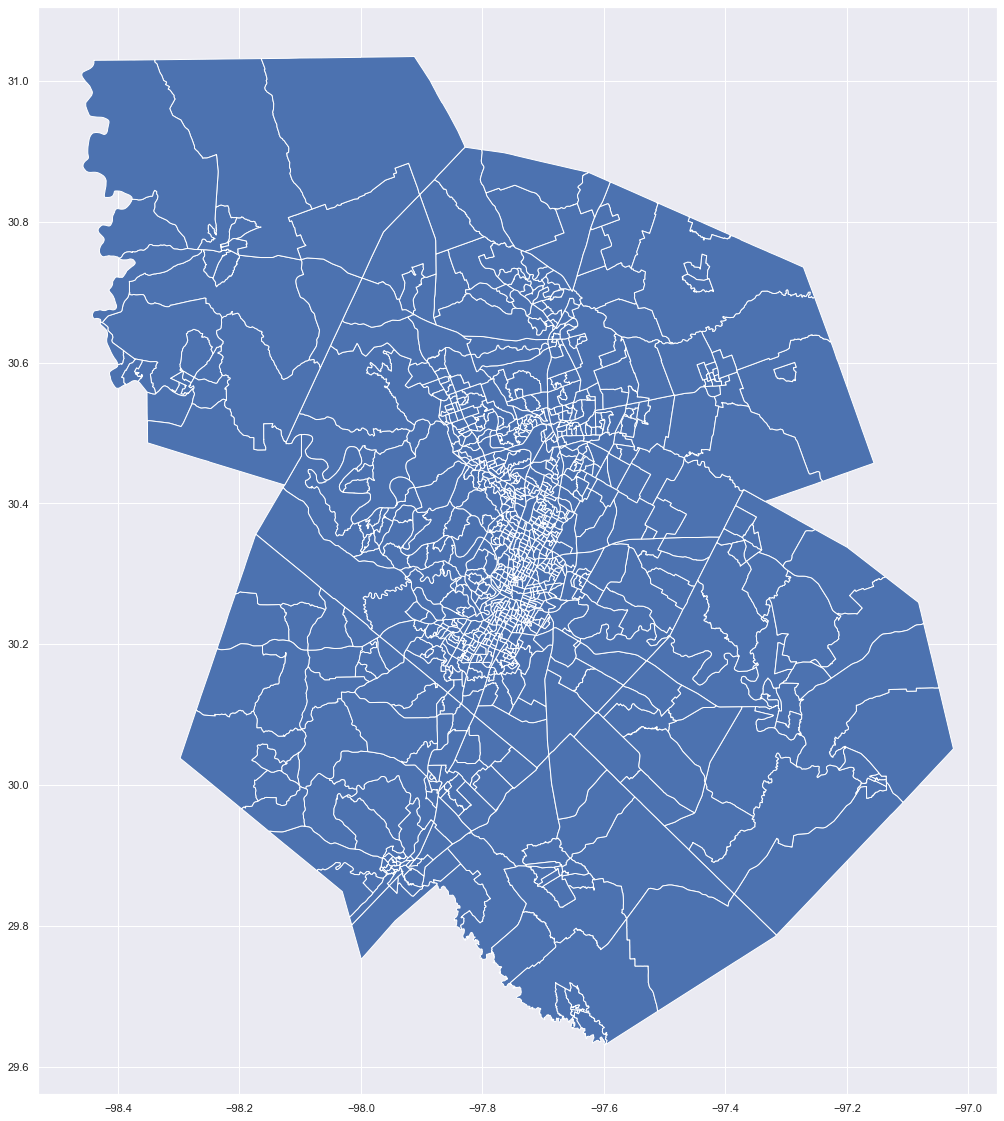

In [9]:
blockGroupAustin.plot(figsize=(40,20))
plt.show()

Austin docked station information

In [10]:
dockedStations = pd.read_csv('data/Census Tracts.csv')
display(dockedStations.columns)

Index(['Kiosk ID', 'Kiosk Name', 'Kiosk Status', 'LocationX', 'LocationY',
       'Address', 'Alternate Name', 'City Asset Number', 'Property Type',
       'Number of Docks', 'Power Type', 'Footprint Length', 'Footprint Width',
       'Notes', 'Council District', 'Image', 'Modified Date', 'Census Tracts',
       '2020 Census Blocks', '116th Congressional Districts',
       '2018 State Legislative Districts - Lower',
       '2018 State Legislative Districts - Upper', 'Counties',
       'County Subdivisions', 'Incorporated Places', 'States'],
      dtype='object')

In [11]:
# crs_4326 = CRS.from_epsg(4326)
# crs_26910 = CRS.from_epsg(26910)
# transformer = Transformer.from_crs(crs_4326, crs_4326)
# dockedStations['coord-x'] = 0.0000000000
# dockedStations['coord-y'] = 0.0000000000
# for i in range(len(dockedStations)):
#     tuple1 = transformer.transform(dockedStations['LocationY'][i], dockedStations['LocationX'][i])
#     dockedStations['coord-x'][i] = tuple1[0]
#     dockedStations['coord-y'][i] = tuple1[1]

In [12]:
dockedStations

,Kiosk ID,Kiosk Name,Kiosk Status,LocationX,LocationY,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,...,Modified Date,Census Tracts,2020 Census Blocks,116th Congressional Districts,2018 State Legislative Districts - Lower,2018 State Legislative Districts - Upper,Counties,County Subdivisions,Incorporated Places,States
0,2548,UT West Mall @ Guadalupe,active,-97.74181,30.28576,2242 Guadalupe St.,NaN,16748.0,paid_parking,15.0,...,1/4/21 0:00,"[{'GEOID': '48453000608', 'CENTLAT': '+30.2849...","[{'SUFFIX': '', 'GEOID': '484530006081005', 'C...","[{'GEOID': '4821', 'CENTLAT': '+30.0186023', '...","[{'GEOID': '48049', 'CENTLAT': '+30.3207107', ...","[{'GEOID': '48014', 'CENTLAT': '+30.2226102', ...","[{'GEOID': '48453', 'CENTLAT': '+30.3343599', ...","[{'COUSUB': '90165', 'GEOID': '4845390165', 'C...","[{'NECTAPCI': 'N', 'GEOID': '4805000', 'CENTLA...","[{'STATENS': '01779801', 'GEOID': '48', 'CENTL..."
1,2549,Long Center @ South 1st & Riverside,active,-97.74971,30.25941,Presented by Austin Energy,NaN,16750.0,sidewalk,13.0,...,1/4/21 0:00,"[{'GEOID': '48453001311', 'CENTLAT': '+30.2577...","[{'SUFFIX': '', 'GEOID': '484530013111005', 'C...","[{'GEOID': '4821', 'CENTLAT': '+30.0186023', '...","[{'GEOID': '48051', 'CENTLAT': '+30.1694960', ...","[{'GEOID': '48014', 'CENTLAT': '+30.2226102', ...","[{'GEOID': '48453', 'CENTLAT': '+30.3343599', ...","[{'COUSUB': '90165', 'GEOID': '4845390165', 'C...","[{'NECTAPCI': 'N', 'GEOID': '4805000', 'CENTLA...","[{'STATENS': '01779801', 'GEOID': '48', 'CENTL..."
2,2552,3rd & West,active,-97.75189,30.26780,652 W. 3rd St,NaN,16727.0,paid_parking,13.0,...,1/4/21 0:00,"[{'GEOID': '48453001200', 'CENTLAT': '+30.2737...","[{'SUFFIX': '', 'GEOID': '484530012004004', 'C...","[{'GEOID': '4821', 'CENTLAT': '+30.0186023', '...","[{'GEOID': '48049', 'CENTLAT': '+30.3207107', ...","[{'GEOID': '48014', 'CENTLAT': '+30.2226102', ...","[{'GEOID': '48453', 'CENTLAT': '+30.3343599', ...","[{'COUSUB': '90165', 'GEOID': '4845390165', 'C...","[{'NECTAPCI': 'N', 'GEOID': '4805000', 'CENTLA...","[{'STATENS': '01779801', 'GEOID': '48', 'CENTL..."
3,2561,State Capitol Visitors Garage @ San Jacinto & ...,active,-97.73805,30.27336,1201 San Jacinto Blvd.,NaN,16764.0,sidewalk,13.0,...,1/4/21 0:00,"[{'GEOID': '48453000700', 'CENTLAT': '+30.2777...","[{'SUFFIX': '', 'GEOID': '484530007001075', 'C...","[{'GEOID': '4825', 'CENTLAT': '+31.5014326', '...","[{'GEOID': '48049', 'CENTLAT': '+30.3207107', ...","[{'GEOID': '48014', 'CENTLAT': '+30.2226102', ...","[{'GEOID': '48453', 'CENTLAT': '+30.3343599', ...","[{'COUSUB': '90165', 'GEOID': '4845390165', 'C...","[{'NECTAPCI': 'N', 'GEOID': '4805000', 'CENTLA...","[{'STATENS': '01779801', 'GEOID': '48', 'CENTL..."
4,2562,San Jacinto & 8th Street,active,-97.73986,30.26912,782 San Jacinto Blvd.,NaN,16755.0,paid_parking,13.0,...,1/4/21 0:00,"[{'GEOID': '48453001101', 'CENTLAT': '+30.2711...","[{'SUFFIX': '', 'GEOID': '484530011011018', 'C...","[{'GEOID': '4821', 'CENTLAT': '+30.0186023', '...","[{'GEOID': '48049', 'CENTLAT': '+30.3207107', ...","[{'GEOID': '48014', 'CENTLAT': '+30.2226102', ...","[{'GEOID': '48453', 'CENTLAT': '+30.3343599', ...","[{'COUSUB': '90165', 'GEOID': '4845390165', 'C...","[{'NECTAPCI': 'N', 'GEOID': '4805000', 'CENTLA...","[{'STATENS': '01779801', 'GEOID': '48', 'CENTL..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2541,State Capitol @ 14th & Colorado,closed,-97.74155,30.27654,206 W. 14th St.,NaN,NaN,NaN,NaN,...,1/4/21 0:00,"[{'GEOID': '48453000700', 'CENTLAT': '+30.2777...","[{'SUFFIX': '', 'GEOID': '484530007001059', 'C...","[{'GEOID': '4825', 'CENTLAT': '+31.5014326', '...","[{'GEOID': '48049', 'CENTLAT': '+30.3207107', ...","[{'GEOID': '48014', 'CENTLAT': '+30.2226102', ...","[{'GEOID': '48453', 'CENTLAT': '+30.3343599', ...","[{'COUSUB': '90165', 'GEOID': '4845390165', 'C...","[{'NECTAPCI': 'N', 'GEOID': '4805000', 'CENTLA...","[{'STATENS': '01779801', 'GEOID': '48', 'CENTL..."
94,2545

In [13]:
dockedStations.columns

Index(['Kiosk ID', 'Kiosk Name', 'Kiosk Status', 'LocationX', 'LocationY',
       'Address', 'Alternate Name', 'City Asset Number', 'Property Type',
       'Number of Docks', 'Power Type', 'Footprint Length', 'Footprint Width',
       'Notes', 'Council District', 'Image', 'Modified Date', 'Census Tracts',
       '2020 Census Blocks', '116th Congressional Districts',
       '2018 State Legislative Districts - Lower',
       '2018 State Legislative Districts - Upper', 'Counties',
       'County Subdivisions', 'Incorporated Places', 'States'],
      dtype='object')

In [14]:
## why there are some stations' number of docks are nan??
dockedStations['Number of Docks'].unique()

array([15., 13., 19., 16.,  9., 12., 11., 17., 18., 10., 22., nan, 14.,
        0.])

In [15]:
station_centers = gpd.GeoDataFrame(dockedStations,geometry=gpd.points_from_xy(dockedStations['LocationX'],dockedStations['LocationY']), crs='epsg:4326')

In [16]:
station_centers = station_centers[['Kiosk ID','Number of Docks','geometry','LocationX','LocationY']]

In [17]:
locations = gpd.sjoin(station_centers, blockGroupAustin, how="inner")

In [18]:
locations.groupby('GEOID')

In [19]:
locations.to_csv('out/docked-shared-bike-parking-hubs.csv')

### Find best R^2 

In [1]:
import geopandas as gpd
from geopandas.tools import sjoin
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
%matplotlib inline
import pandas as pd
from pyproj import CRS
from pyproj import Transformer
import seaborn as sns
sns.set(style="darkgrid")
import scipy as sp
import time
import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
def simulated_trips_distribution_by_TAZs(filename):
    taz = gpd.read_file('data/block_groups_austin.shp').to_crs("epsg:26910")
    taz = taz[['GEOID','geometry']]
    taz['area'] = taz['geometry'].to_crs({'init': 'epsg:26910'}).area
    data = pd.read_csv('data/' + filename)
    data = data[data['time'] <= 86400]
    data = data[data['type'] == 'PathTraversal']
    data = data[data['mode'] == 'bike']
    data = data[data['vehicle'].str.startswith('austin')]
    crs_4326 = CRS.from_epsg(4326)
    crs_26910 = CRS.from_epsg(26910)
    transformer = Transformer.from_crs(crs_4326, crs_26910)
    data['coord-x'] = 0.0000000000
    data['coord-y'] = 0.0000000000
    data = data.reset_index(drop=True)
    for i in range(len(data)):
        tuple1 = transformer.transform(data['startY'][i], data['startX'][i])
        data['coord-x'][i] = tuple1[0]
        data['coord-y'][i] = tuple1[1]
    station_centers = gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(data['coord-x'],data['coord-y']), crs='epsg:26910')  
    station_centers = station_centers[['driver','geometry']]
    locations = gpd.sjoin(station_centers, taz, how="inner")
    locations.groupby('GEOID')
    locations.to_csv('out/simulated distribution of trip' + filename + '.csv')
    df = pd.read_csv('out/simulated distribution of trip' + filename + '.csv')
    frequency_df = df.groupby('GEOID').count()
    frequency_df.to_csv('out/simulated distribution of trip' + filename + '.csv')
    del data
    del df
    del frequency_df

In [58]:
simulated_trips_distribution_by_TAZs('austin-dockless-data.gz')

In [61]:
data = pd.read_csv('data/docklessausb4.csv')

In [66]:

pd.set_option("display.max_columns", None)

In [70]:
## do we have longitude, latitude or tract shape files
data = data[data['reposition'] != 1]

In [71]:
# are we looking at the modified date?
# modified - 4/17/2019 is Wednesday, why day of week is 5?
# 11/10/2018 is Saturday, why day of week is 5?
data = data[data['day_of_week'] < 6]

## do we have maps for council_district or census tract?

,id,vehicle_type,dur_sec,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district__start_,council_district__end_,year,st_dt,end_dt,st_date,end_date,st_time,dur_min,dist,weekend,dur_sec2,dur_min2,bike,st_id,end_id,r_st_id,r_end_id,r_st_dt,r_end_dt,repo_window,repo_min,repo_hr,reposition,mph,st_tract2,end_tract2
0,9b673216-df14-45c1-be7c-97c9fe46fde7,scooter,1241,2869.0,11/10/2018 20:00:00,14:15:00,4/17/2019 07:11:34,11,20,5,9.0,9.0,2018,11/10/2018 14:00:00,11/10/2018 14:15:00,11/10/2018,11/10/2018,14:00:00,20.683333,1.783095,1,900.0,15.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.172556,604.0,601.0
1,9ce8b54b-5783-41be-b856-b2c522cc5994,scooter,2466,6222.0,11/10/2018 22:45:00,17:30:00,4/17/2019 06:02:36,11,23,5,9.0,9.0,2018,11/10/2018 16:45:00,11/10/2018 17:30:00,11/10/2018,11/10/2018,16:45:00,41.100000,3.866998,1,2700.0,45.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.645253,601.0,601.0
2,a9ea9a0c-83e2-49f9-83ea-1177cc807f5c,scooter,506,870.0,11/11/2018 01:30:00,19:30:00,4/17/2019 02:16:04,11,1,6,9.0,9.0,2018,11/10/2018 19:30:00,11/10/2018 19:30:00,11/10/2018,11/10/2018,19:30:00,8.433333,0.540709,1,0.0,0.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.846938,601.0,601.0
4,fb7f73b2-8c5f-465e-9cbe-806e9af77969,scooter,270,450.0,11/11/2018 18:00:00,12:00:00,4/17/2019 02:40:56,11,18,6,9.0,9.0,2018,11/11/2018 12:00:00,11/11/2018 12:00:00,11/11/2018,11/11/2018,12:00:00,4.500000,0.279677,1,0.0,0.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.729024,1100.0,1100.0
5,6822c174-629d-4efa-aa89-6dbf840fa066,scooter,897,511.0,11/11/2018 20:15:00,14:30:00,4/17/2019 07:32:23,11,20,6,9.0,9.0,2018,11/11/2018 14:15:00,11/11/2018 14:30:00,11/11/2018,11/11/2018,14:15:00,14.950000,0.317589,1,900.0,15.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.274603,1100.0,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16941523,d158e549-1c54-4ad0-8e07-da943ec2a7b1,scooter,494,1700.0,10/22/2018 14:15:00,09:30:00,4/17/2019 02:03:38,10,14,0,9.0,9.0,2018,10/22/2018 09:15:00,10/22/2018 09:30:00,10/22/2018,10/22/2018,09:15:00,8.233333,1.056557,0,900.0,15.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.699605,1100.0,1100.0
16941524,82ee0d0a-a6c9-4928-b572-f9f791605476,scooter,896,3000.0,10/22/2018 14:45:00,10:00:00,4/17/2019 02:41:12,10,15,0,9.0,9.0,2018,10/22/2018 09:45:00,10/22/2018 10:00:00,10/22/2018,10/22/2018,09:45:00,14.933333,1.864512,0,900.0,15.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.491343,1100.0,1100.0
16941526,252254f0-c902-4492-ac90-15012207e433,scooter,310,1000.0,10/22/2018 23:30:00,18:45:00,4/17/2019 06:06:51,10,23,0,3.0,3.0,2018,10/22/2018 18:30:00,10/22/2018 18:45:00,10/22/2018,10/22/2018,18:30:00,5.166667,0.621504,0,900.0,15.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.217466,902.0,902.0
16941528,a8f4f202-7782-4b1f-89c1-73e35501c33d,scooter,1861,6200.0,10/23/2018 14:45:00,10:15:00,4/17/2019 02:43:25,10,15,1,3.0,3.0,2018,10/23/2018 09:45:00,10/23/2018 10:15:00,10/23/2018,10/23/2018,09:45:00,31.016667,3.853325,0,1800.0,30.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.454041,2111.0,902.0


In [62]:
taz = gpd.read_file('data/block_groups_austin.shp').to_crs("epsg:26910")
taz = taz[['GEOID','geometry']]
taz['area'] = taz['geometry'].to_crs({'init': 'epsg:26910'}).area
data = pd.read_csv('data/' + 'docklessausb4.csv')
display(data.columns)



Index(['id', 'vehicle_type', 'dur_sec', 'trip_distance', 'start_time',
       'end_time', 'modified_date', 'month', 'hour', 'day_of_week',
       'council_district__start_', 'council_district__end_', 'year', 'st_dt',
       'end_dt', 'st_date', 'end_date', 'st_time', 'dur_min', 'dist',
       'weekend', 'dur_sec2', 'dur_min2', 'bike', 'st_id', 'end_id', 'r_st_id',
       'r_end_id', 'r_st_dt', 'r_end_dt', 'repo_window', 'repo_min', 'repo_hr',
       'reposition', 'mph', 'st_tract2', 'end_tract2'],
      dtype='object')

In [ ]:
data = data.rename(columns = {'ST_STN_LAT': 'startY', 'ST_STN_LON': 'startX', 'END_STN_LAT': 'endY', 'END_STN_LON': 'endX', 'ST_DATE' : 'time', 'BIKE_TYPE' : 'vehicle', 'RIDE_ID' : 'driver'}, inplace = False)

In [ ]:

data = data[['time', 'vehicle', 'driver', 'startX', 'startY', 'endX', 'endY']]
crs_4326 = CRS.from_epsg(4326)
crs_26910 = CRS.from_epsg(26910)
transformer = Transformer.from_crs(crs_4326, crs_26910)
data['coord-x'] = 0.0000000000
data['coord-y'] = 0.0000000000
data = data.reset_index(drop=True)
for i in range(len(data)):
    tuple1 = transformer.transform(data['startY'][i], data['startX'][i])
    data['coord-x'][i] = tuple1[0]
    data['coord-y'][i] = tuple1[1]
station_centers = gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(data['coord-x'],data['coord-y']), crs='epsg:26910')
display(station_centers.columns)
station_centers = station_centers[['driver','geometry','time']]
locations = gpd.sjoin(station_centers, taz, how="inner")
locations.groupby('objectid')
locations.to_csv('out/shared-bike-observed.csv')
df = pd.read_csv('out/shared-bike-observed.csv')
frequency_df = df.groupby(['time', 'objectid']).count()
modified = frequency_df.reset_index()

### Find best R^2 -- Docked

simulation data 

In [162]:
dockedSimulation = pd.read_csv('data/0.2pop-austin-dockedbikes-baseline.gz')
display(dockedSimulation.columns)

Index(['score', 'parkingTaz', 'chargingPointType', 'pricingModel',
       'parkingType', 'driver', 'vehicle', 'time', 'type', 'person', 'link',
       'facility', 'actType', 'legMode', 'vehicleType', 'locationY',
       'locationX', 'parkingZoneId', 'price', 'fuel', 'duration',
       'shiftStatus', 'departTime', 'startX', 'startY', 'endX', 'endY',
       'currentTourMode', 'arrivalTime', 'departureTime', 'primaryFuelLevel',
       'secondaryFuelLevel', 'links', 'numPassengers', 'length', 'primaryFuel',
       'mode', 'riders', 'toStopIndex', 'fromStopIndex', 'seatingCapacity',
       'tollPaid', 'capacity', 'linkTravelTime', 'secondaryFuel',
       'secondaryFuelType', 'primaryFuelType', 'reason', 'cost',
       'expectedMaximumUtility', 'availableAlternatives', 'location',
       'personalVehicleAvailable', 'tourIndex', 'incentive', 'tollCost',
       'netCost'],
      dtype='object')

observed data

bike
ST_YEAR ST_MONTH            
2013    12        112.571429
2014    1          83.652174
        2         141.350000
        3         790.238095
        4         387.272727
...                      ...
2021    3         460.000000
        4         476.000000
        5         507.142857
        6         464.000000
        7         451.227273

[90 rows x 1 columns]

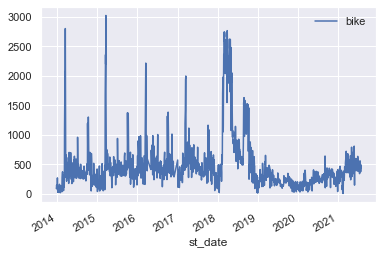

In [273]:
data = pd.read_csv('data/bcycleaus4.csv')
# Pick up weekday datas
data = data[data['weekend'] == 0]
# Filter out inference data
data = data[data['reposition'] != 1]
# Aggregation over daily rides
agg_data = data.groupby('st_date').agg({'bike': 'count'})
agg_data = agg_data.reset_index(drop=False)
agg_data.st_date = pd.to_datetime(agg_data.st_date)
agg_data.plot(x='st_date', y='bike')
# Agg: annual mean daily ride
agg_data['ST_YEAR'] = agg_data.st_date.dt.year
agg_data['ST_MONTH'] = agg_data.st_date.dt.month
display(agg_data.groupby(['ST_YEAR', 'ST_MONTH']).mean())
# there are some big shrinks in 2019

bike
ST_YEAR ST_MONTH              
2018    4          2629.368421
        5           836.375000
        6          2420.619048
        7          4100.363636
        8         10374.521739
        9         12651.400000
        10        15390.086957
        11        14604.136364
        12        11083.142857
2019    1         10663.652174
        2         14917.250000
        3         25706.714286
        4         18491.772727
        5         17040.173913
        6         14912.000000
        7         14786.347826
        8         14447.909091
        9         17466.238095
        10        15335.782609
        11        10045.476190
        12         7355.545455
2020    1          7207.173913
        2          8284.050000
        3          5313.000000
        4           527.409091
        5          1075.047619
        6          3041.590909
        7          3445.478261
        8          4985.714286
        9          4497.636364
        10         5127.363636
        11         4447.666667
        12         2972.086957
2021    1          3252.142857
        2          2316.500000
        3          6731.000000
        4          7263.454545
        5          9777.857143
        6          9773.454545
        7         10690.863636
        8          9136.545455
        9         10366.500000
        10        11589.523810
        11         4112.000000

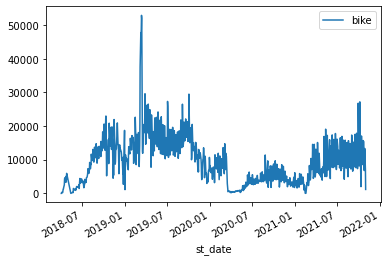

In [4]:
import pandas as pd
data = pd.read_csv('data/Observed-data/docklessausb4.csv')
# Pick up weekday datas
data = data[data['weekend'] == 0]
# Filter out inference data
data = data[data['reposition'] != 1]
# Aggregation over daily rides
agg_data = data.groupby('st_date').agg({'bike': 'count'})
agg_data = agg_data.reset_index(drop=False)
agg_data.st_date = pd.to_datetime(agg_data.st_date)
agg_data.plot(x='st_date', y='bike')
# Agg: annual mean daily ride
agg_data['ST_YEAR'] = agg_data.st_date.dt.year
agg_data['ST_MONTH'] = agg_data.st_date.dt.month
display(agg_data.groupby(['ST_YEAR', 'ST_MONTH']).mean())
# there are some big shrinks in 2019

In [274]:
a = agg_data.groupby(['ST_YEAR', 'ST_MONTH']).mean()

In [275]:
a.reset_index()

,ST_YEAR,ST_MONTH,bike
0,2013,12,112.571429
1,2014,1,83.652174
2,2014,2,141.350000
3,2014,3,790.238095
4,2014,4,387.272727
...,...,...,...
85,2021,3,460.000000
86,2021,4,476.000000
87,2021,5,507.142857
88,2021,6,464.000000


set year and month for observed data

In [276]:
data.st_date = pd.to_datetime(data.st_date)
data['ST_YEAR'] = data.st_date.dt.year
data['ST_MONTH'] = data.st_date.dt.month

In [277]:
pd.set_option('display.max_columns', None)
data

,membership_type,bike_type,st_date,st_time,end_time,end_date,st_dt,end_dt,st_stn,st_stn_name,end_stn,end_stn_name,dur_sec2,dur_min,bike,type,st_stn_lat,st_stn_lon,st_tract,end_stn_lat,end_stn_lon,end_tract,dist,repo_window,repo_min,repo_hr,reposition,weekend,mph,dur_hr,st_tract2,end_tract2,ST_YEAR,ST_MONTH
0,24-Hour Kiosk (Austin B-cycle),NaN,2014-01-08,23:12:00,23:12:00,1/08/2014,1/08/2014 23:12:00,1/08/2014 23:12:00,2498.0,Convention Center / 4th St. @ MetroRail,2498.0,Convention Center / 4th St. @ MetroRail,0.0,0.0,NaN,DAY,30.26483,-97.73900,4.845300e+10,30.26483,-97.73900,4.845300e+10,0.000000,NaN,NaN,NaN,NaN,0,NaN,0.000000,1103.0,1103.0,2014,1
1,24-Hour Kiosk (Austin B-cycle),NaN,2014-03-06,11:12:00,11:53:00,3/06/2014,3/06/2014 11:12:00,3/06/2014 11:53:00,2498.0,Convention Center / 4th St. @ MetroRail,2571.0,Red River & 8th Street,2460.0,41.0,NaN,DAY,30.26483,-97.73900,4.845300e+10,30.26854,-97.73646,4.845300e+10,0.297861,NaN,NaN,NaN,NaN,0,0.435894,0.683333,1103.0,1101.0,2014,3
2,24-Hour Kiosk (Austin B-cycle),NaN,2014-03-07,11:12:00,11:13:00,3/07/2014,3/07/2014 11:12:00,3/07/2014 11:13:00,2542.0,Plaza Saltillo,2542.0,Plaza Saltillo,60.0,1.0,NaN,DAY,30.26217,-97.72743,4.845300e+10,30.26217,-97.72743,4.845300e+10,0.000000,NaN,NaN,NaN,NaN,0,0.000000,0.016667,902.0,902.0,2014,3
3,24-Hour Kiosk (Austin B-cycle),NaN,2014-03-07,13:12:00,13:23:00,3/07/2014,3/07/2014 13:12:00,3/07/2014 13:23:00,2571.0,Red River & 8th Street,2501.0,5th & Bowie,660.0,11.0,NaN,DAY,30.26854,-97.73646,4.845300e+10,30.26960,-97.75332,4.845300e+10,1.008976,NaN,NaN,NaN,NaN,0,5.503506,0.183333,1101.0,1200.0,2014,3
4,24-Hour Kiosk (Austin B-cycle),NaN,2014-03-07,16:12:00,16:12:00,3/07/2014,3/07/2014 16:12:00,3/07/2014 16:12:00,2498.0,Convention Center / 4th St. @ MetroRail,2498.0,Convention Center / 4th St. @ MetroRail,0.0,0.0,NaN,DAY,30.26483,-97.73900,4.845300e+10,30.26483,-97.73900,4.845300e+10,0.000000,NaN,NaN,NaN,NaN,0,NaN,0.000000,1103.0,1103.0,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629186,Local365,NaN,2021-07-22,18:37:10,18:45:10,7/22/2021,7/22/2021 18:37:10,7/22/2021 18:45:10,3793.0,28th/Rio Grande,3798.0,21st/Speedway @ PCL,480.0,8.0,21903.0,YEAR,30.29333,-97.74412,4.845300e+10,30.28300,-97.73750,4.845300e+10,0.815902,NaN,NaN,NaN,NaN,0,6.119267,0.133333,606.0,601.0,2021,7
1629187,Student Membership,NaN,2021-07-22,19:50:07,19:56:07,7/22/2021,7/22/2021 19:50:07,7/22/2021 19:56:07,3798.0,21st/Speedway @ PCL,3792.0,22nd/Pearl,360.0,6.0,21903.0,STUD,30.28300,-97.73750,4.845300e+10,30.28530,-97.74670,4.845300e+10,0.571576,NaN,NaN,NaN,NaN,0,5.715764,0.100000,601.0,607.0,2021,7
1629188,Local31,NaN,2021-07-23,13:07:22,13:40:22,7/23/2021,7/23/2021 13:07:22,7/23/2021 13:40:22,3792.0,22nd/Pearl,3792.0,22nd/Pearl,1980.0,33.0,21903.0,MNTH,30.28530,-97.74670,4.845300e+10,30.28530,-97.74670,4.845300e+10,0.000000,NaN,NaN,NaN,NaN,0,0.000000,0.550000,607.0,607.0,2021,7
1629189,Student Membership,NaN,2021-07-23,17:10:55,17:16:55,7/23/2021,7/23/2021 17:10:55,7/23/2021 17:16:55,3792.0,22nd/Pearl,2548.0,Guadalupe/West Mall @ University Co-op,360.0,6.0,21903.0,STUD,30.28530,-97.74670,4.845300e+10,30.28576,-97.74181,4.845300e+10,0.293544,NaN,NaN,NaN,NaN,0,2.935442,0.100000,607.0,608.0,2021,7


get observed data distribution by blockGroups

In [278]:
blockGroup = gpd.read_file('data/block_groups_austin.shp')

In [279]:
blockGroup

,GEOID,STATE,COUNTY,TRACT,BLKGRP,CENTLAT,CENTLON,geometry
0,484530014012,48,453,001401,2,+30.2451069,-097.7478800,"POLYGON ((-97.75217 30.24291, -97.75191 30.243..."
1,484530024071,48,453,002407,1,+30.1415464,-097.8134396,"POLYGON ((-97.83232 30.12975, -97.83227 30.130..."
2,484530017493,48,453,001749,3,+30.2328405,-097.8327918,"POLYGON ((-97.84060 30.23364, -97.84056 30.233..."
3,484530019171,48,453,001917,1,+30.2889860,-097.8341578,"POLYGON ((-97.84306 30.28668, -97.84303 30.286..."
4,484530024112,48,453,002411,2,+30.1994992,-097.7560889,"POLYGON ((-97.76163 30.20171, -97.76089 30.202..."
...,...,...,...,...,...,...,...,...
989,480539602001,48,053,960200,1,+30.9069409,-098.1982438,"POLYGON ((-98.33925 31.03038, -98.33911 31.030..."
990,480539602002,48,053,960200,2,+30.9061264,-098.3475533,"POLYGON ((-98.45924 31.01038, -98.45874 31.011..."
991,480539601001,48,053,960100,1,+30.9389439,-098.0037029,"POLYGON ((-98.16400 31.03206, -98.16002 31.032..."
992,480539608003,48,053,960800,3,+30.4850325,-098.2187000,"POLYGON ((-98.35152 30.51719, -98.35097 30.517..."


In [280]:
blockGroup = blockGroup[['GEOID', 'geometry']]

In [281]:
blockGroup['area'] = blockGroup['geometry'].to_crs({'init': 'epsg:4326'}).area

In [282]:
data = data.rename(columns = {'st_stn_lat': 'startY', 'st_stn_lon': 'startX', 'end_stn_lat': 'endY', 'end_stn_lon': 'endX'}, inplace = False)

In [283]:
data

,membership_type,bike_type,st_date,st_time,end_time,end_date,st_dt,end_dt,st_stn,st_stn_name,end_stn,end_stn_name,dur_sec2,dur_min,bike,type,startY,startX,st_tract,endY,endX,end_tract,dist,repo_window,repo_min,repo_hr,reposition,weekend,mph,dur_hr,st_tract2,end_tract2,ST_YEAR,ST_MONTH
0,24-Hour Kiosk (Austin B-cycle),NaN,2014-01-08,23:12:00,23:12:00,1/08/2014,1/08/2014 23:12:00,1/08/2014 23:12:00,2498.0,Convention Center / 4th St. @ MetroRail,2498.0,Convention Center / 4th St. @ MetroRail,0.0,0.0,NaN,DAY,30.26483,-97.73900,4.845300e+10,30.26483,-97.73900,4.845300e+10,0.000000,NaN,NaN,NaN,NaN,0,NaN,0.000000,1103.0,1103.0,2014,1
1,24-Hour Kiosk (Austin B-cycle),NaN,2014-03-06,11:12:00,11:53:00,3/06/2014,3/06/2014 11:12:00,3/06/2014 11:53:00,2498.0,Convention Center / 4th St. @ MetroRail,2571.0,Red River & 8th Street,2460.0,41.0,NaN,DAY,30.26483,-97.73900,4.845300e+10,30.26854,-97.73646,4.845300e+10,0.297861,NaN,NaN,NaN,NaN,0,0.435894,0.683333,1103.0,1101.0,2014,3
2,24-Hour Kiosk (Austin B-cycle),NaN,2014-03-07,11:12:00,11:13:00,3/07/2014,3/07/2014 11:12:00,3/07/2014 11:13:00,2542.0,Plaza Saltillo,2542.0,Plaza Saltillo,60.0,1.0,NaN,DAY,30.26217,-97.72743,4.845300e+10,30.26217,-97.72743,4.845300e+10,0.000000,NaN,NaN,NaN,NaN,0,0.000000,0.016667,902.0,902.0,2014,3
3,24-Hour Kiosk (Austin B-cycle),NaN,2014-03-07,13:12:00,13:23:00,3/07/2014,3/07/2014 13:12:00,3/07/2014 13:23:00,2571.0,Red River & 8th Street,2501.0,5th & Bowie,660.0,11.0,NaN,DAY,30.26854,-97.73646,4.845300e+10,30.26960,-97.75332,4.845300e+10,1.008976,NaN,NaN,NaN,NaN,0,5.503506,0.183333,1101.0,1200.0,2014,3
4,24-Hour Kiosk (Austin B-cycle),NaN,2014-03-07,16:12:00,16:12:00,3/07/2014,3/07/2014 16:12:00,3/07/2014 16:12:00,2498.0,Convention Center / 4th St. @ MetroRail,2498.0,Convention Center / 4th St. @ MetroRail,0.0,0.0,NaN,DAY,30.26483,-97.73900,4.845300e+10,30.26483,-97.73900,4.845300e+10,0.000000,NaN,NaN,NaN,NaN,0,NaN,0.000000,1103.0,1103.0,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629186,Local365,NaN,2021-07-22,18:37:10,18:45:10,7/22/2021,7/22/2021 18:37:10,7/22/2021 18:45:10,3793.0,28th/Rio Grande,3798.0,21st/Speedway @ PCL,480.0,8.0,21903.0,YEAR,30.29333,-97.74412,4.845300e+10,30.28300,-97.73750,4.845300e+10,0.815902,NaN,NaN,NaN,NaN,0,6.119267,0.133333,606.0,601.0,2021,7
1629187,Student Membership,NaN,2021-07-22,19:50:07,19:56:07,7/22/2021,7/22/2021 19:50:07,7/22/2021 19:56:07,3798.0,21st/Speedway @ PCL,3792.0,22nd/Pearl,360.0,6.0,21903.0,STUD,30.28300,-97.73750,4.845300e+10,30.28530,-97.74670,4.845300e+10,0.571576,NaN,NaN,NaN,NaN,0,5.715764,0.100000,601.0,607.0,2021,7
1629188,Local31,NaN,2021-07-23,13:07:22,13:40:22,7/23/2021,7/23/2021 13:07:22,7/23/2021 13:40:22,3792.0,22nd/Pearl,3792.0,22nd/Pearl,1980.0,33.0,21903.0,MNTH,30.28530,-97.74670,4.845300e+10,30.28530,-97.74670,4.845300e+10,0.000000,NaN,NaN,NaN,NaN,0,0.000000,0.550000,607.0,607.0,2021,7
1629189,Student Membership,NaN,2021-07-23,17:10:55,17:16:55,7/23/2021,7/23/2021 17:10:55,7/23/2021 17:16:55,3792.0,22nd/Pearl,2548.0,Guadalupe/West Mall @ University Co-op,360.0,6.0,21903.0,STUD,30.28530,-97.74670,4.845300e+10,30.28576,-97.74181,4.845300e+10,0.293544,NaN,NaN,NaN,NaN,0,2.935442,0.100000,607.0,608.0,2021,7


In [284]:
data = data[['ST_YEAR', 'ST_MONTH', 'membership_type', 'startX', 'startY', 'endX', 'endY','st_date']]

In [285]:
data['coord-x'] = data['startX']
data['coord-y'] = data['startY']

In [286]:
data = data.reset_index(drop=True)

In [287]:
station_centers = gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(data['coord-x'],data['coord-y']), crs='epsg:4326')
station_centers = station_centers[['membership_type','geometry', 'ST_YEAR', 'ST_MONTH', 'st_date']]

In [288]:
locations = gpd.sjoin(station_centers, blockGroup, how="inner")
locations.groupby('GEOID')

In [289]:
locations

,membership_type,geometry,ST_YEAR,ST_MONTH,st_date,index_right,GEOID,area
0,24-Hour Kiosk (Austin B-cycle),POINT (-97.73900 30.26483),2014,1,2014-01-08,113,484530011001,0.000198
1,24-Hour Kiosk (Austin B-cycle),POINT (-97.73900 30.26483),2014,3,2014-03-06,113,484530011001,0.000198
3,24-Hour Kiosk (Austin B-cycle),POINT (-97.73646 30.26854),2014,3,2014-03-07,113,484530011001,0.000198
4,24-Hour Kiosk (Austin B-cycle),POINT (-97.73900 30.26483),2014,3,2014-03-07,113,484530011001,0.000198
6,Annual Membership (Austin B-cycle),POINT (-97.73900 30.26483),2014,3,2014-03-07,113,484530011001,0.000198
...,...,...,...,...,...,...,...,...
918304,Local365,POINT (-97.69807 30.25212),2021,4,2021-04-13,166,484530021112,0.000217
919788,Explorer,POINT (-97.69807 30.25212),2021,6,2021-06-25,166,484530021112,0.000217
920059,3-Day Weekender,POINT (-97.69807 30.25212),2021,4,2021-04-07,166,484530021112,0.000217
920064,Local365,POINT (-97.69807 30.25212),2021,4,2021-04-09,166,484530021112,0.000217


In [290]:
locations.to_csv('out/shared-bike-observed.csv')
df = pd.read_csv('out/shared-bike-observed.csv')

In [291]:
df[(df['ST_YEAR'] == 2014) & (df['ST_MONTH'] == 1)]

,Unnamed: 0,membership_type,geometry,ST_YEAR,ST_MONTH,st_date,index_right,GEOID,area
0,0,24-Hour Kiosk (Austin B-cycle),POINT (-97.739 30.26483),2014,1,2014-01-08,113,484530011001,0.000198
6483,34511,24-Hour Kiosk (Austin B-cycle),POINT (-97.74378 30.26634),2014,1,2014-01-01,113,484530011001,0.000198
6484,34512,24-Hour Kiosk (Austin B-cycle),POINT (-97.74378 30.26634),2014,1,2014-01-02,113,484530011001,0.000198
6485,34514,Founding Member (Austin B-cycle),POINT (-97.74802 30.26751),2014,1,2014-01-07,113,484530011001,0.000198
6486,34515,Founding Member (Austin B-cycle),POINT (-97.739 30.26483),2014,1,2014-01-07,113,484530011001,0.000198
...,...,...,...,...,...,...,...,...,...
478167,716855,24-Hour Kiosk (Austin B-cycle),POINT (-97.74926000000001 30.25103),2014,1,2014-01-02,485,484530013053,0.000061
478168,716858,24-Hour Kiosk (Austin B-cycle),POINT (-97.75019 30.24891),2014,1,2014-01-02,485,484530013053,0.000061
478169,716859,Annual Membership (Austin B-cycle),POINT (-97.75019 30.24891),2014,1,2014-01-03,485,484530013053,0.000061
478170,716872,24-Hour Kiosk (Austin B-cycle),POINT (-97.74926000000001 30.25103),2014,1,2014-01-14,485,484530013053,0.000061


In [296]:
frequency_df = df.groupby(['ST_YEAR',  'ST_MONTH', 'st_date', 'GEOID']).count()
modified = frequency_df.reset_index()

In [300]:
modified = modified.groupby(['ST_YEAR',  'ST_MONTH', 'GEOID']).mean()

In [302]:
modified.reset_index()

,ST_YEAR,ST_MONTH,GEOID,Unnamed: 0,membership_type,geometry,index_right,area
0,2013,12,484530011001,71.000000,71.000000,71.000000,71.000000,71.000000
1,2013,12,484530012002,14.142857,14.142857,14.142857,14.142857,14.142857
2,2013,12,484530013051,9.857143,9.857143,9.857143,9.857143,9.857143
3,2013,12,484530013053,17.571429,17.571429,17.571429,17.571429,17.571429
4,2014,1,484530007001,8.000000,8.000000,8.000000,8.000000,8.000000
...,...,...,...,...,...,...,...,...
1757,2021,7,484530019011,2.750000,2.750000,2.750000,2.750000,2.750000
1758,2021,7,484530019111,15.227273,15.227273,15.227273,15.227273,15.227273
1759,2021,7,484530021112,1.750000,1.750000,1.750000,1.750000,1.750000
1760,2021,7,484530023041,7.227273,7.227273,7.227273,7.227273,7.227273


In [180]:
def simulated_trips_distribution_by_blockGroups(filename):
    blockGroups = gpd.read_file('data/block_groups_austin.shp')
    blockGroups = blockGroups[['GEOID','geometry']]
    blockGroups['area'] = blockGroups['geometry'].to_crs({'init': 'epsg:4326'}).area
    data = pd.read_csv('data/' + filename)
    data = data[data['time'] <= 86400]
    data = data[data['type'] == 'PathTraversal']
    data = data[data['mode'] == 'bike']
    data = data[data['vehicleType'].str.startswith('shared')]
    data['coord-x'] = data['startX']
    data['coord-y'] = data['startY']
    data = data.reset_index(drop=True)
    station_centers = gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(data['coord-x'],data['coord-y']), crs='epsg:4326')  
    station_centers = station_centers[['driver','geometry']]
    locations = gpd.sjoin(station_centers, blockGroups, how="inner")
    locations.groupby('GEOID')
    locations.to_csv('out/simulated distribution of trip ' + filename + '.csv')
    df = pd.read_csv('out/simulated distribution of trip ' + filename + '.csv')
    frequency_df = df.groupby('GEOID').count()
    frequency_df.to_csv('out/simulated distribution of trip' + filename + '.csv')
    del data
    del df
    del frequency_df

In [181]:
simulated_trips_distribution_by_blockGroups('0.2pop-austin-dockedbikes-baseline.gz')

In [304]:
modified = modified.reset_index()

In [305]:
modified

,ST_YEAR,ST_MONTH,GEOID,Unnamed: 0,membership_type,geometry,index_right,area
0,2013,12,484530011001,71.000000,71.000000,71.000000,71.000000,71.000000
1,2013,12,484530012002,14.142857,14.142857,14.142857,14.142857,14.142857
2,2013,12,484530013051,9.857143,9.857143,9.857143,9.857143,9.857143
3,2013,12,484530013053,17.571429,17.571429,17.571429,17.571429,17.571429
4,2014,1,484530007001,8.000000,8.000000,8.000000,8.000000,8.000000
...,...,...,...,...,...,...,...,...
1757,2021,7,484530019011,2.750000,2.750000,2.750000,2.750000,2.750000
1758,2021,7,484530019111,15.227273,15.227273,15.227273,15.227273,15.227273
1759,2021,7,484530021112,1.750000,1.750000,1.750000,1.750000,1.750000
1760,2021,7,484530023041,7.227273,7.227273,7.227273,7.227273,7.227273


In [306]:
def find_best_RS(filename):
    r_squares = {}
    for year in modified['ST_YEAR'].unique():
        for month in modified['ST_MONTH']:
            forMerge = modified[(modified.ST_YEAR == year) & (modified.ST_MONTH == month)]
            observed = forMerge
            simulated = pd.read_csv('out/simulated distribution of trip' + filename + '.csv')
            merged_inner = pd.merge(left=observed, right=simulated, how="outer", left_on='GEOID', right_on='GEOID')
            merged_inner['index_right_x'].replace({np.nan : 0}, inplace=True)
            merged_inner['driver'].replace({np.nan : 0}, inplace=True)
            merged_inner['observed'] = merged_inner['index_right_x']
            merged_inner['simulated'] = merged_inner['driver'] * 5
            merged_inner.to_csv('out/' + filename + 'oberserved-simulated-by-taz.csv')
            correlation_matrix = np.corrcoef(merged_inner['observed'], merged_inner['simulated'])
            correlation_xy = correlation_matrix[0,1]
            r_squared = correlation_xy**2
            r_squares[str(year) + "/" + str(month)] = r_squared
    new_value = max(r_squares, key=r_squares.get)
    print(filename + " " + str(new_value) + " " + str(r_squares[new_value]))

In [307]:
find_best_RS('0.2pop-austin-dockedbikes-baseline.gz')

0.2pop-austin-dockedbikes-baseline.gz 2014/3 0.5806226360019967


## Best Match Month

In [308]:
forMerge = modified[(modified.ST_YEAR == modified.ST_YEAR[4]) & (modified.ST_MONTH == 3)]
observed = forMerge
simulated = pd.read_csv('out/simulated distribution of trip' + '0.2pop-austin-dockedbikes-baseline.gz' + '.csv')
merged_inner = pd.merge(left=observed, right=simulated, how="outer", left_on='GEOID', right_on='GEOID')
merged_inner['index_right_x'].replace({np.nan : 0}, inplace=True)
merged_inner['driver'].replace({np.nan : 0}, inplace=True)
merged_inner['observed'] = merged_inner['index_right_x']
merged_inner['simulated'] = merged_inner['driver'] * 5
merged_inner.to_csv('out/' + '0.2pop-austin-dockedbikes-baseline.gz' + 'oberserved-simulated-by-blockGroups.csv')
correlation_matrix = np.corrcoef(merged_inner['observed'], merged_inner['simulated'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

In [309]:
data = pd.read_csv('out/0.2pop-austin-dockedbikes-baseline.gzoberserved-simulated-by-blockGroups.csv')

In [310]:
sns.set_theme(color_codes=True)

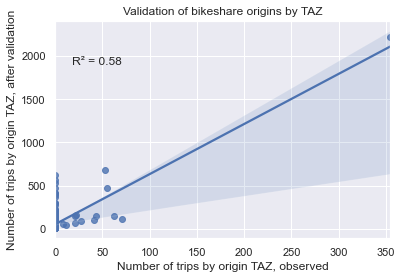

In [311]:
r, p = sp.stats.pearsonr(data['observed'], data['simulated'])
ax = plt.gca()
ax.text(.05, .8, 'R² = {:.2f}'.format(r * r),
            transform=ax.transAxes)

sns.regplot(x="observed", y="simulated", data=data)
ax.set_title("Validation of bikeshare origins by TAZ")
ax.set_xlabel("Number of trips by origin TAZ, observed")
ax.set_ylabel("Number of trips by origin TAZ, after validation")
plt.savefig('Validation of bikeshare origins by TAZ.png')

heatMap

In [312]:
nb = 'data/block_groups_austin.shp'
region = gpd.read_file(nb)

In [313]:
data2 = pd.read_csv('out/' + '0.2pop-austin-dockedbikes-baseline.gz' + 'oberserved-simulated-by-taz.csv')

In [314]:
data2

,Unnamed: 0,ST_YEAR,ST_MONTH,GEOID,Unnamed: 0_x,membership_type,geometry_x,index_right_x,area_x,Unnamed: 0_y,driver,geometry_y,index_right_y,area_y,observed,simulated
0,0,2021.0,7.0,484530004012,7.590909,7.590909,7.590909,7.590909,7.590909,73,73,73,73,73,7.590909,365
1,1,2021.0,7.0,484530006012,34.045455,34.045455,34.045455,34.045455,34.045455,40,40,40,40,40,34.045455,200
2,2,2021.0,7.0,484530006035,30.500000,30.500000,30.500000,30.500000,30.500000,2,2,2,2,2,30.500000,10
3,3,2021.0,7.0,484530006042,25.227273,25.227273,25.227273,25.227273,25.227273,19,19,19,19,19,25.227273,95
4,4,2021.0,7.0,484530006043,19.681818,19.681818,19.681818,19.681818,19.681818,10,10,10,10,10,19.681818,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,949,NaN,NaN,484910216011,NaN,NaN,NaN,0.000000,NaN,1,1,1,1,1,0.000000,5
950,950,NaN,NaN,484910216012,NaN,NaN,NaN,0.000000,NaN,2,2,2,2,2,0.000000,10
951,951,NaN,NaN,484910216013,NaN,NaN,NaN,0.000000,NaN,3,3,3,3,3,0.000000,15
952,952,NaN,NaN,484910216021,NaN,NaN,NaN,0.000000,NaN,2,2,2,2,2,0.000000,10


In [315]:
data2['count'] = data2['simulated'] - data2['observed']
data2['count'].min()

-20.5

In [316]:
data2['count'].max()

2117.9545454545455

In [221]:
region

,GEOID,STATE,COUNTY,TRACT,BLKGRP,CENTLAT,CENTLON,geometry
0,484530014012,48,453,001401,2,+30.2451069,-097.7478800,"POLYGON ((-97.75217 30.24291, -97.75191 30.243..."
1,484530024071,48,453,002407,1,+30.1415464,-097.8134396,"POLYGON ((-97.83232 30.12975, -97.83227 30.130..."
2,484530017493,48,453,001749,3,+30.2328405,-097.8327918,"POLYGON ((-97.84060 30.23364, -97.84056 30.233..."
3,484530019171,48,453,001917,1,+30.2889860,-097.8341578,"POLYGON ((-97.84306 30.28668, -97.84303 30.286..."
4,484530024112,48,453,002411,2,+30.1994992,-097.7560889,"POLYGON ((-97.76163 30.20171, -97.76089 30.202..."
...,...,...,...,...,...,...,...,...
989,480539602001,48,053,960200,1,+30.9069409,-098.1982438,"POLYGON ((-98.33925 31.03038, -98.33911 31.030..."
990,480539602002,48,053,960200,2,+30.9061264,-098.3475533,"POLYGON ((-98.45924 31.01038, -98.45874 31.011..."
991,480539601001,48,053,960100,1,+30.9389439,-098.0037029,"POLYGON ((-98.16400 31.03206, -98.16002 31.032..."
992,480539608003,48,053,960800,3,+30.4850325,-098.2187000,"POLYGON ((-98.35152 30.51719, -98.35097 30.517..."


In [250]:
data2

,Unnamed: 0,ST_YEAR,ST_MONTH,GEOID,Unnamed: 0_x,membership_type,geometry_x,index_right_x,area_x,Unnamed: 0_y,driver,geometry_y,index_right_y,area_y,observed,simulated,count
0,0,2021.0,7.0,0 484530004012\n1 484530006012\n2 ...,167.0,167.0,167.0,167.0,167.0,73,73,73,73,73,167.0,365,198.0
1,1,2021.0,7.0,0 484530004012\n1 484530006012\n2 ...,749.0,749.0,749.0,749.0,749.0,40,40,40,40,40,749.0,200,-549.0
2,2,2021.0,7.0,0 484530004012\n1 484530006012\n2 ...,671.0,671.0,671.0,671.0,671.0,2,2,2,2,2,671.0,10,-661.0
3,3,2021.0,7.0,0 484530004012\n1 484530006012\n2 ...,555.0,555.0,555.0,555.0,555.0,19,19,19,19,19,555.0,95,-460.0
4,4,2021.0,7.0,0 484530004012\n1 484530006012\n2 ...,433.0,433.0,433.0,433.0,433.0,10,10,10,10,10,433.0,50,-383.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,949,NaN,NaN,0 484530004012\n1 484530006012\n2 ...,NaN,NaN,NaN,0.0,NaN,1,1,1,1,1,0.0,5,5.0
950,950,NaN,NaN,0 484530004012\n1 484530006012\n2 ...,NaN,NaN,NaN,0.0,NaN,2,2,2,2,2,0.0,10,10.0
951,951,NaN,NaN,0 484530004012\n1 484530006012\n2 ...,NaN,NaN,NaN,0.0,NaN,3,3,3,3,3,0.0,15,15.0
952,952,NaN,NaN,0 484530004012\n1 484530006012\n2 ...,NaN,NaN,NaN,0.0,NaN,2,2,2,2,2,0.0,10,10.0


In [232]:
type(region)

geopandas.geodataframe.GeoDataFrame

In [235]:
region = pd.DataFrame(region)

In [238]:
region['GEOID'] = str(region['GEOID'])

In [237]:
type(region)

pandas.core.frame.DataFrame

In [239]:
data2['GEOID'] = str(data2['GEOID'])

In [240]:
type(data2)

pandas.core.frame.DataFrame

In [248]:
merged = pd.merge(left=region, right=data2, how="outer", left_on='GEOID', right_on='GEOID')

In [249]:
merged

,GEOID,STATE,COUNTY,TRACT,BLKGRP,CENTLAT,CENTLON,geometry,Unnamed: 0,ST_YEAR,ST_MONTH,Unnamed: 0_x,membership_type,geometry_x,index_right_x,area_x,Unnamed: 0_y,driver,geometry_y,index_right_y,area_y,observed,simulated,count
0,0 484530014012\n1 484530024071\n2 ...,48,453,001401,2,+30.2451069,-097.7478800,"POLYGON ((-97.75217 30.24291, -97.75191 30.243...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0 484530014012\n1 484530024071\n2 ...,48,453,002407,1,+30.1415464,-097.8134396,"POLYGON ((-97.83232 30.12975, -97.83227 30.130...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0 484530014012\n1 484530024071\n2 ...,48,453,001749,3,+30.2328405,-097.8327918,"POLYGON ((-97.84060 30.23364, -97.84056 30.233...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0 484530014012\n1 484530024071\n2 ...,48,453,001917,1,+30.2889860,-097.8341578,"POLYGON ((-97.84306 30.28668, -97.84303 30.286...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0 484530014012\n1 484530024071\n2 ...,48,453,002411,2,+30.1994992,-097.7560889,"POLYGON ((-97.76163 30.20171, -97.76089 30.202...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,0 484530004012\n1 484530006012\n2 ...,NaN,NaN,NaN,NaN,NaN,NaN,None,949.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,5.0,5.0
1944,0 484530004012\n1 484530006012\n2 ...,NaN,NaN,NaN,NaN,NaN,NaN,None,950.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.0,2.0,2.0,2.0,2.0,0.0,10.0,10.0
1945,0 484530004012\n1 484530006012\n2 ...,NaN,NaN,NaN,NaN,NaN,NaN,None,951.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3.0,3.0,3.0,3.0,3.0,0.0,15.0,15.0
1946,0 484530004012\n1 484530006012\n2 ...,NaN,NaN,NaN,NaN,NaN,NaN,None,952.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.0,2.0,2.0,2.0,2.0,0.0,10.0,10.0


In [211]:
def heatmap_plot(filename):

    data2['count'] = data2['simulated'] - data2['observed']
    data2['count'].min()
    # Join the dataset with the available mapping files.
    # We will fill in the neighbourhoods which were not present in the dataset with 0.
    # this way we will still see the neighbourhood in the map, but no housing will be shown on it.
    merged = region.set_index('GEOID').join(data2.set_index('GEOID'))
    merged = merged.reset_index()
    merged = merged.fillna(0)
    merged[['GEOID', 'geometry', 'count']]
    #overrepresented
    merge1 = merged[merged['count'] > 0]
    #correct
    merge2 = merged[merged['count'] == 0]
    #underrepresented
    merge3 = merged[merged['count'] < 0]


    # Join the dataset with the available mapping files.
    # We will fill in the neighbourhoods which were not present in the dataset with 0.
    # this way we will still see the neighbourhood in the map, but no housing will be shown on it.
    # merged = regions.set_index('objectid').join(data3.set_index('name'))
    # merged = merged.reset_index()
    # merged = merged.fillna(0)
    # merged[['name', 'geometry', 'count']]
    # #overrepresented
    # merge4 = merged[merged['count'] > 0]
    # #correct
    # merge5 = merged[merged['count'] == 0]
    # #underrepresented
    # merge6 = merged[merged['count'] < 0]
    merge3['count'] = abs(merge3['count'])
    # merge6['count'] = abs(merge6['count'])
    # we are using the maximum and minimum count values from the previous cell.
    # setting additionally properties for the plot such as titles, turning of the axis for better visibility
    # and setting the color scheme to look like a heat map.

    fig, ax = plt.subplots(1, figsize=(40, 20))
    ax.axis('off')
    # ax.set_title('Heat Map of overrepresented or underrepresented number of trips in the simulation', fontdict={'fontsize': '40', 'fontweight' : '3'})


    # Create colorbar as a legend
    # empty array for the data range
    # add the colorbar to the figure
    # # set the color bar label text size
    # color = 'Oranges'
    # vmin, vmax = 0, 27
    # sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # sm._A = []
    # cbar = fig.colorbar(sm)
    # cbar.ax.tick_params(labelsize=20)

    # # Create colorbar as a legend
    # # empty array for the data range
    # # add the colorbar to the figure
    # # set the color bar label text size
    # color = 'Blues'
    # vmin, vmax = 0, 17
    # sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # sm._A = []
    # cbar = fig.colorbar(sm)
    # cbar.ax.tick_params(labelsize=20)



    # Create colorbar as a legend
    # empty array for the data range
    # add the colorbar to the figure
    # set the color bar label text size
    # color = 'Oranges'
    # vmin, vmax = -1, 13
    # sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # sm._A = []
    # cbar = fig.colorbar(sm)
    # cbar.ax.tick_params(labelsize=20)

    # actually plot the map
    # # we will only annotate the plot for neighbourhoods with more than 50 houses sold
    # red_patch1 = mpatches.Patch(color='orange', label='overrepresented')

    # red_patch2 = mpatches.Patch(color='aliceblue', label='same')

    # red_patch3 = mpatches.Patch(color='blue', label='underrepresented')
    # plt.legend(handles=[red_patch1,red_patch2,red_patch3],fontsize = 'xx-large')
    merge1.plot('count', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
    merge2.plot('count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20),alpha=0.6)
    merge3.plot('count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20), alpha=0.6)



    # merge4.plot('count', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
    # merge5.plot('count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20),alpha=0.6)
    # merge6.plot('count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20), alpha=0.6)

    plt.title(filename)
    plt.savefig('Heat Map of overrepresented or underrepresented number of trips in the simulation_origin' + filename + '.png', transparent=True)
    plt.subplots_adjust(bottom=0.19)

In [212]:
heatmap_plot()

ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

<Figure size 2880x1440 with 1 Axes>

calculate bike trips

In [7]:
import pandas as pd
bikeShare = pd.read_csv('data/0.2pop-austin-docked.gz')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (0,8,13,17,18,19,23,24,25,27,29,32,33,36,44,46,47,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
pathTraversal = bikeShare[bikeShare['type'] == 'PathTraversal']

In [9]:
bike = pathTraversal[pathTraversal['mode'] == 'bike']

In [10]:
len(bike.vehicleType.str.startswith('shared'))

11119

In [11]:
bike

,person,departTime,startX,startY,endX,endY,time,type,currentTourMode,arrivalTime,...,primaryFuelType,shiftStatus,parkingZoneId,price,fuel,duration,score,incentive,tollCost,netCost
217548,NaN,NaN,-97.649139,29.877434,-97.664914,29.878585,18240.0,PathTraversal,bike,18240.0,...,Gasoline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220329,NaN,NaN,-97.786689,30.462893,-97.794424,30.460744,18298.0,PathTraversal,bike,18298.0,...,Gasoline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221258,NaN,NaN,-97.700614,30.366990,-97.699440,30.371819,18352.0,PathTraversal,bike,18352.0,...,Gasoline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224158,NaN,NaN,-97.676399,29.888687,-97.699291,29.884640,18398.0,PathTraversal,bike,18398.0,...,Gasoline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224482,NaN,NaN,-97.706894,30.318331,-97.698603,30.322230,18415.0,PathTraversal,bike,18415.0,...,Gasoline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17897811,NaN,NaN,-97.506510,29.764440,-97.499779,29.727730,89473.0,PathTraversal,bike,89473.0,...,Gasoline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17912708,NaN,NaN,-97.747656,30.404634,-97.760896,30.401674,91109.0,PathTraversal,bike,91109.0,...,Gasoline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17919205,NaN,NaN,-97.761079,30.402532,-97.750607,30.405200,91938.0,PathTraversal,bike,91938.0,...,Gasoline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17961067,NaN,NaN,-97.734222,30.364264,-97.795557,30.362953,100779.0,PathTraversal,bike,100779.0,...,Gasoline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2010 Census Tract Data

In [23]:
import cenpy
import osmnx
import contextily
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [24]:
aus_data = cenpy.products.ACS().from_place('Austin, TX',
                                           variables=['B02001_001E', 'B02001_003E'])

/opt/anaconda3/lib/python3.8/site-packages/cenpy/geoparser.py:226: UserWarning: Shape is invalid: 
Ring Self-intersection[-10884881.1468 3554135.7868]
  tell_user("Shape is invalid: \n{}".format(vexplain))
/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Matched: Austin, TX to Austin city within layer Incorporated Places


In [25]:
aus_graph = osmnx.graph_from_place('Austin, TX')

In [26]:
aus_graph

In [27]:
aus_data

,GEOID,geometry,B02001_001E,B02001_003E,state,county,tract
0,48453001738,"POLYGON ((-10895569.270 3530806.490, -10895537...",6839.0,66.0,48,453,001738
1,48453001749,"POLYGON ((-10894266.830 3533308.740, -10894263...",6507.0,274.0,48,453,001749
2,48453001729,"POLYGON ((-10891755.130 3528693.690, -10891525...",4650.0,26.0,48,453,001729
3,48453002423,"POLYGON ((-10889272.370 3525921.290, -10889122...",5705.0,443.0,48,453,002423
4,48453002005,"POLYGON ((-10885758.680 3533118.060, -10885748...",5446.0,171.0,48,453,002005
...,...,...,...,...,...,...,...
126,48453002104,"POLYGON ((-10876389.700 3543930.930, -10876310...",3618.0,190.0,48,453,002104
127,48453001824,"POLYGON ((-10874392.510 3552749.040, -10874333...",1704.0,93.0,48,453,001824
128,48453002112,"POLYGON ((-10874941.430 3544262.080, -10874891...",5203.0,1125.0,48,453,002112
129,48453001833,"POLYGON ((-10874583.870 3549696.970, -10874438...",9379.0,1177.0,48,453,001833


<AxesSubplot:>

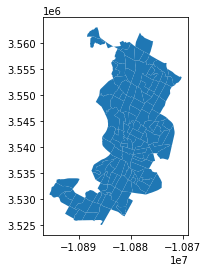

In [30]:
aus_data.plot()

## Are we gonna do hourly distribution by hour?
## Does this map looks right?

In [33]:
blockGroup

,GEOID,geometry,area
0,484530014012,"POLYGON ((-97.75217 30.24291, -97.75191 30.243...",0.000057
1,484530024071,"POLYGON ((-97.83232 30.12975, -97.83227 30.130...",0.000722
2,484530017493,"POLYGON ((-97.84060 30.23364, -97.84056 30.233...",0.000097
3,484530019171,"POLYGON ((-97.84306 30.28668, -97.84303 30.286...",0.000153
4,484530024112,"POLYGON ((-97.76163 30.20171, -97.76089 30.202...",0.000072
...,...,...,...
989,480539602001,"POLYGON ((-98.33925 31.03038, -98.33911 31.030...",0.038109
990,480539602002,"POLYGON ((-98.45924 31.01038, -98.45874 31.011...",0.035411
991,480539601001,"POLYGON ((-98.16400 31.03206, -98.16002 31.032...",0.051459
992,480539608003,"POLYGON ((-98.35152 30.51719, -98.35097 30.517...",0.014784


<AxesSubplot:>

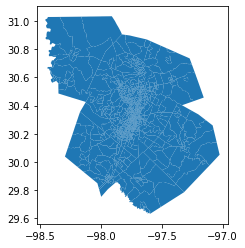

In [32]:
blockGroup.plot()

In [29]:
aus_data.to_csv('data/Spatial-data/aus_data.csv')

# Do some spatial analysis

In [9]:
import pandas as pd
import geopandas as gpd

/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [4]:
data = pd.read_csv('data/Several-ITER-Runs/student.gz')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (0,4,10,18,19,21,31,32,33,34,36,37,38,42,44,45,50,52,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
bike = data[data['mode'] == 'bike']

In [8]:
bike['vehicle'].unique()

array([nan, '281304', '332648', ..., '1528404',
       'sharedVehicle-austinBike-1157', '1801426'], dtype=object)

In [12]:
bikeTraversal = bike[bike['type'] == 'PathTraversal']

In [19]:
bikeTraversal[bikeTraversal['vehicle'].str.startswith('sharedVehicle')]

,person,vehicle,time,type,mode,incentive,tollCost,netCost,link,legMode,...,duration,score,expectedMaximumUtility,availableAlternatives,location,personalVehicleAvailable,tourIndex,facility,actType,departTime
282414,NaN,sharedVehicle-austinBike-528,18761.0,PathTraversal,bike,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291159,NaN,sharedVehicle-austinBike-528,18895.0,PathTraversal,bike,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327831,NaN,sharedVehicle-austinBike-648,19351.0,PathTraversal,bike,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327887,NaN,sharedVehicle-austinBike-196,19356.0,PathTraversal,bike,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330950,NaN,sharedVehicle-austinBike-648,19369.0,PathTraversal,bike,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25858720,NaN,sharedVehicle-austinBike-1319,100329.0,PathTraversal,bike,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25864000,NaN,sharedVehicle-austinBike-313,102523.0,PathTraversal,bike,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25864175,NaN,sharedVehicle-austinBike-313,102640.0,PathTraversal,bike,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25866585,NaN,sharedVehicle-austinBike-313,103970.0,PathTraversal,bike,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


bike
ST_YEAR ST_MONTH              
2018    4          2629.368421
        5           836.375000
        6          2420.619048
        7          4100.363636
        8         10374.521739
        9         12651.400000
        10        15390.086957
        11        14604.136364
        12        11083.142857
2019    1         10663.652174
        2         14917.250000
        3         25706.714286
        4         18491.772727
        5         17040.173913
        6         14912.000000
        7         14786.347826
        8         14447.909091
        9         17466.238095
        10        15335.782609
        11        10045.476190
        12         7355.545455
2020    1          7207.173913
        2          8284.050000
        3          5313.000000
        4           527.409091
        5          1075.047619
        6          3041.590909
        7          3445.478261
        8          4985.714286
        9          4497.636364
        10         5127.363636
        11         4447.666667
        12         2972.086957
2021    1          3252.142857
        2          2316.500000
        3          6731.000000
        4          7263.454545
        5          9777.857143
        6          9773.454545
        7         10690.863636
        8          9136.545455
        9         10366.500000
        10        11589.523810
        11         4112.000000

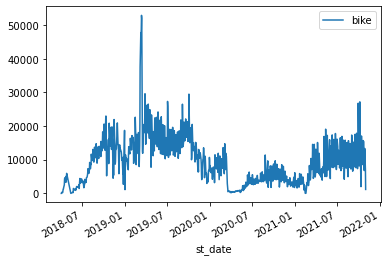

In [14]:
import pandas as pd
data = pd.read_csv('data/Observed-data/docklessausb4.csv')
# Pick up weekday datas
data = data[data['weekend'] == 0]
# Filter out inference data
data = data[data['reposition'] != 1]
# Aggregation over daily rides
agg_data = data.groupby('st_date').agg({'bike': 'count'})
agg_data = agg_data.reset_index(drop=False)
agg_data.st_date = pd.to_datetime(agg_data.st_date)
agg_data.plot(x='st_date', y='bike')
# Agg: annual mean daily ride
agg_data['ST_YEAR'] = agg_data.st_date.dt.year
agg_data['ST_MONTH'] = agg_data.st_date.dt.month
display(agg_data.groupby(['ST_YEAR', 'ST_MONTH']).mean())
# there are some big shrinks in 2019

# around 10k -> find which one fits best

In [15]:
a = agg_data.groupby(['ST_YEAR', 'ST_MONTH']).mean()
a.reset_index()

,ST_YEAR,ST_MONTH,bike
0,2018,4,2629.368421
1,2018,5,836.375000
2,2018,6,2420.619048
3,2018,7,4100.363636
4,2018,8,10374.521739
5,2018,9,12651.400000
6,2018,10,15390.086957
7,2018,11,14604.136364
8,2018,12,11083.142857
9,2019,1,10663.652174


In [45]:
data.st_date = pd.to_datetime(data.st_date)
data['ST_YEAR'] = data.st_date.dt.year
data['ST_MONTH'] = data.st_date.dt.month
pd.set_option('display.max_columns', None)
blockGroup = gpd.read_file('data/Spatial-data/block_groups_austin.shp')
blockGroup


,GEOID,STATE,COUNTY,TRACT,BLKGRP,CENTLAT,CENTLON,geometry
0,484530014012,48,453,001401,2,+30.2451069,-097.7478800,"POLYGON ((-97.75217 30.24291, -97.75191 30.243..."
1,484530024071,48,453,002407,1,+30.1415464,-097.8134396,"POLYGON ((-97.83232 30.12975, -97.83227 30.130..."
2,484530017493,48,453,001749,3,+30.2328405,-097.8327918,"POLYGON ((-97.84060 30.23364, -97.84056 30.233..."
3,484530019171,48,453,001917,1,+30.2889860,-097.8341578,"POLYGON ((-97.84306 30.28668, -97.84303 30.286..."
4,484530024112,48,453,002411,2,+30.1994992,-097.7560889,"POLYGON ((-97.76163 30.20171, -97.76089 30.202..."
...,...,...,...,...,...,...,...,...
989,480539602001,48,053,960200,1,+30.9069409,-098.1982438,"POLYGON ((-98.33925 31.03038, -98.33911 31.030..."
990,480539602002,48,053,960200,2,+30.9061264,-098.3475533,"POLYGON ((-98.45924 31.01038, -98.45874 31.011..."
991,480539601001,48,053,960100,1,+30.9389439,-098.0037029,"POLYGON ((-98.16400 31.03206, -98.16002 31.032..."
992,480539608003,48,053,960800,3,+30.4850325,-098.2187000,"POLYGON ((-98.35152 30.51719, -98.35097 30.517..."


str

In [46]:
blockGroup['area'] = blockGroup['geometry'].to_crs({'init': 'epsg:4326'}).area
data = data.rename(columns = {'st_stn_lat': 'startY', 'st_stn_lon': 'startX', 'end_stn_lat': 'endY', 'end_stn_lon': 'endX'}, inplace = False)
data

/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/z4/5gq1j4sn50b62w40lgwsthh80000gn/T/ipykernel_2877/126446995.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  blockGroup['area'] = blockGroup['geometry'].to_crs({'init': 'epsg:4326'}).area


,id,vehicle_type,dur_sec,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district__start_,council_district__end_,year,st_dt,end_dt,st_date,end_date,st_time,dur_min,dist,weekend,dur_sec2,dur_min2,bike,st_id,end_id,r_st_id,r_end_id,r_st_dt,r_end_dt,repo_window,repo_min,repo_hr,reposition,mph,st_tract2,end_tract2,ST_YEAR,ST_MONTH
15,20b3b867-6901-4a85-9381-9a454e39c968,scooter,84,0.0,11/21/2018 13:30:00,07:30:00,4/17/2019 02:30:14,11,13,2,9.0,9.0,2018,11/21/2018 07:30:00,11/21/2018 07:30:00,2018-11-21,11/21/2018,07:30:00,1.400000,0.000000,0,0.0,0.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,306.0,306.0,2018.0,11.0
16,e85b647d-c7db-446a-8613-0559720fb4a7,scooter,103,4.0,11/21/2018 14:30:00,08:30:00,4/17/2019 02:24:47,11,14,2,9.0,9.0,2018,11/21/2018 08:30:00,11/21/2018 08:30:00,2018-11-21,11/21/2018,08:30:00,1.716667,0.002486,0,0.0,0.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086890,306.0,306.0,2018.0,11.0
17,1dc43d82-9fa5-4e47-ac9b-b11dade6f36e,scooter,262,428.0,11/21/2018 23:15:00,17:30:00,4/17/2019 02:03:47,11,23,2,9.0,9.0,2018,11/21/2018 17:15:00,11/21/2018 17:30:00,2018-11-21,11/21/2018,17:15:00,4.366667,0.266004,0,900.0,15.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.655013,306.0,306.0,2018.0,11.0
19,8ccff239-850b-4fe6-b83e-bebf272cfa25,scooter,2745,5045.0,11/22/2018 21:15:00,16:00:00,4/17/2019 01:59:10,11,22,3,9.0,9.0,2018,11/22/2018 15:15:00,11/22/2018 16:00:00,2018-11-22,11/22/2018,15:15:00,45.750000,3.135488,0,2700.0,45.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.112115,1100.0,1100.0,2018.0,11.0
20,a2635005-4bdc-46a4-8cc1-49fd066dc97a,scooter,3164,4544.0,11/22/2018 23:30:00,18:15:00,4/17/2019 16:49:17,11,0,4,9.0,9.0,2018,11/22/2018 17:30:00,11/22/2018 18:15:00,2018-11-22,11/22/2018,17:30:00,52.733333,2.824114,0,2700.0,45.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.213278,1100.0,1100.0,2018.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16941523,d158e549-1c54-4ad0-8e07-da943ec2a7b1,scooter,494,1700.0,10/22/2018 14:15:00,09:30:00,4/17/2019 02:03:38,10,14,0,9.0,9.0,2018,10/22/2018 09:15:00,10/22/2018 09:30:00,2018-10-22,10/22/2018,09:15:00,8.233333,1.056557,0,900.0,15.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.699605,1100.0,1100.0,2018.0,10.0
16941524,82ee0d0a-a6c9-4928-b572-f9f791605476,scooter,896,3000.0,10/22/2018 14:45:00,10:00:00,4/17/2019 02:41:12,10,15,0,9.0,9.0,2018,10/22/2018 09:45:00,10/22/2018 10:00:00,2018-10-22,10/22/2018,09:45:00,14.933333,1.864512,0,900.0,15.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.491343,1100.0,1100.0,2018.0,10.0
16941526,252254f0-c902-4492-ac90-15012207e433,scooter,310,1000.0,10/22/2018 23:30:00,18:45:00,4/17/2019 06:06:51,10,23,0,3.0,3.0,2018,10/22/2018 18:30:00,10/22/2018 18:45:00,2018-10-22,10/22/2018,18:30:00,5.166667,0.621504,0,900.0,15.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.217466,902.0,902.0,2018.0,10.0
16941528,a8f4f202-7782-4b1f-89c1-73e35501c33d,scooter,1861,6200.0,10/23/2018 14:45:00,10:15:00,4/17/2019 02:43:25,10,15,1,3.0,3.0,2018,10/23/2018 09:45:00,10/23/2018 10:15:00,2018-10-23,10/23/2018,09:45:00,31.016667,3.853325,0,1800.0,30.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.454041,2111.0,902.0,2018.0,10.0


In [60]:
import numpy as np

In [67]:
data = data[np.isnan(data['st_tract2']) == False]

In [68]:
data

,id,vehicle_type,dur_sec,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district__start_,council_district__end_,year,st_dt,end_dt,st_date,end_date,st_time,dur_min,dist,weekend,dur_sec2,dur_min2,bike,st_id,end_id,r_st_id,r_end_id,r_st_dt,r_end_dt,repo_window,repo_min,repo_hr,reposition,mph,st_tract2,end_tract2,ST_YEAR,ST_MONTH,start_tract
15,20b3b867-6901-4a85-9381-9a454e39c968,scooter,84,0.0,11/21/2018 13:30:00,07:30:00,4/17/2019 02:30:14,11,13,2,9.0,9.0,2018,11/21/2018 07:30:00,11/21/2018 07:30:00,2018-11-21,11/21/2018,07:30:00,1.400000,0.000000,0,0.0,0.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,306.0,306.0,2018.0,11.0,15 306.0\n16 306.0\n17 ...
16,e85b647d-c7db-446a-8613-0559720fb4a7,scooter,103,4.0,11/21/2018 14:30:00,08:30:00,4/17/2019 02:24:47,11,14,2,9.0,9.0,2018,11/21/2018 08:30:00,11/21/2018 08:30:00,2018-11-21,11/21/2018,08:30:00,1.716667,0.002486,0,0.0,0.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086890,306.0,306.0,2018.0,11.0,15 306.0\n16 306.0\n17 ...
17,1dc43d82-9fa5-4e47-ac9b-b11dade6f36e,scooter,262,428.0,11/21/2018 23:15:00,17:30:00,4/17/2019 02:03:47,11,23,2,9.0,9.0,2018,11/21/2018 17:15:00,11/21/2018 17:30:00,2018-11-21,11/21/2018,17:15:00,4.366667,0.266004,0,900.0,15.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.655013,306.0,306.0,2018.0,11.0,15 306.0\n16 306.0\n17 ...
19,8ccff239-850b-4fe6-b83e-bebf272cfa25,scooter,2745,5045.0,11/22/2018 21:15:00,16:00:00,4/17/2019 01:59:10,11,22,3,9.0,9.0,2018,11/22/2018 15:15:00,11/22/2018 16:00:00,2018-11-22,11/22/2018,15:15:00,45.750000,3.135488,0,2700.0,45.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.112115,1100.0,1100.0,2018.0,11.0,15 306.0\n16 306.0\n17 ...
20,a2635005-4bdc-46a4-8cc1-49fd066dc97a,scooter,3164,4544.0,11/22/2018 23:30:00,18:15:00,4/17/2019 16:49:17,11,0,4,9.0,9.0,2018,11/22/2018 17:30:00,11/22/2018 18:15:00,2018-11-22,11/22/2018,17:30:00,52.733333,2.824114,0,2700.0,45.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.213278,1100.0,1100.0,2018.0,11.0,15 306.0\n16 306.0\n17 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16941523,d158e549-1c54-4ad0-8e07-da943ec2a7b1,scooter,494,1700.0,10/22/2018 14:15:00,09:30:00,4/17/2019 02:03:38,10,14,0,9.0,9.0,2018,10/22/2018 09:15:00,10/22/2018 09:30:00,2018-10-22,10/22/2018,09:15:00,8.233333,1.056557,0,900.0,15.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.699605,1100.0,1100.0,2018.0,10.0,15 306.0\n16 306.0\n17 ...
16941524,82ee0d0a-a6c9-4928-b572-f9f791605476,scooter,896,3000.0,10/22/2018 14:45:00,10:00:00,4/17/2019 02:41:12,10,15,0,9.0,9.0,2018,10/22/2018 09:45:00,10/22/2018 10:00:00,2018-10-22,10/22/2018,09:45:00,14.933333,1.864512,0,900.0,15.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.491343,1100.0,1100.0,2018.0,10.0,15 306.0\n16 306.0\n17 ...
16941526,252254f0-c902-4492-ac90-15012207e433,scooter,310,1000.0,10/22/2018 23:30:00,18:45:00,4/17/2019 06:06:51,10,23,0,3.0,3.0,2018,10/22/2018 18:30:00,10/22/2018 18:45:00,2018-10-22,10/22/2018,18:30:00,5.166667,0.621504,0,900.0,15.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.217466,902.0,902.0,2018.0,10.0,15 306.0\n16 306.0\n17 ...
16941528,a8f4f202-7782-4b1f-89c1-73e35501c33d,scooter,1861,6200.0,10/23/2018 14:45:00,10:15:00,4/17/2019 02:43:25,10,15,1,3.0,3.0,2018,10/23/2018 09:45:00,10/23/2018 10:15:00,2018-10-23,10/23/2018,09:45:00,31.016667,3.853325,0,1800.0,30.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.454041,2111.0,902.0,2018.0,10.

In [69]:
data['start_tract'] = data['st_tract2'].astype(np.int)

/var/folders/z4/5gq1j4sn50b62w40lgwsthh80000gn/T/ipykernel_2877/629872828.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['start_tract'] = data['st_tract2'].astype(np.int)
/var/folders/z4/5gq1j4sn50b62w40lgwsthh80000gn/T/ipykernel_2877/629872828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

In [70]:
data

,id,vehicle_type,dur_sec,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district__start_,council_district__end_,year,st_dt,end_dt,st_date,end_date,st_time,dur_min,dist,weekend,dur_sec2,dur_min2,bike,st_id,end_id,r_st_id,r_end_id,r_st_dt,r_end_dt,repo_window,repo_min,repo_hr,reposition,mph,st_tract2,end_tract2,ST_YEAR,ST_MONTH,start_tract
15,20b3b867-6901-4a85-9381-9a454e39c968,scooter,84,0.0,11/21/2018 13:30:00,07:30:00,4/17/2019 02:30:14,11,13,2,9.0,9.0,2018,11/21/2018 07:30:00,11/21/2018 07:30:00,2018-11-21,11/21/2018,07:30:00,1.400000,0.000000,0,0.0,0.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,306.0,306.0,2018.0,11.0,306
16,e85b647d-c7db-446a-8613-0559720fb4a7,scooter,103,4.0,11/21/2018 14:30:00,08:30:00,4/17/2019 02:24:47,11,14,2,9.0,9.0,2018,11/21/2018 08:30:00,11/21/2018 08:30:00,2018-11-21,11/21/2018,08:30:00,1.716667,0.002486,0,0.0,0.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086890,306.0,306.0,2018.0,11.0,306
17,1dc43d82-9fa5-4e47-ac9b-b11dade6f36e,scooter,262,428.0,11/21/2018 23:15:00,17:30:00,4/17/2019 02:03:47,11,23,2,9.0,9.0,2018,11/21/2018 17:15:00,11/21/2018 17:30:00,2018-11-21,11/21/2018,17:15:00,4.366667,0.266004,0,900.0,15.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.655013,306.0,306.0,2018.0,11.0,306
19,8ccff239-850b-4fe6-b83e-bebf272cfa25,scooter,2745,5045.0,11/22/2018 21:15:00,16:00:00,4/17/2019 01:59:10,11,22,3,9.0,9.0,2018,11/22/2018 15:15:00,11/22/2018 16:00:00,2018-11-22,11/22/2018,15:15:00,45.750000,3.135488,0,2700.0,45.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.112115,1100.0,1100.0,2018.0,11.0,1100
20,a2635005-4bdc-46a4-8cc1-49fd066dc97a,scooter,3164,4544.0,11/22/2018 23:30:00,18:15:00,4/17/2019 16:49:17,11,0,4,9.0,9.0,2018,11/22/2018 17:30:00,11/22/2018 18:15:00,2018-11-22,11/22/2018,17:30:00,52.733333,2.824114,0,2700.0,45.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.213278,1100.0,1100.0,2018.0,11.0,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16941523,d158e549-1c54-4ad0-8e07-da943ec2a7b1,scooter,494,1700.0,10/22/2018 14:15:00,09:30:00,4/17/2019 02:03:38,10,14,0,9.0,9.0,2018,10/22/2018 09:15:00,10/22/2018 09:30:00,2018-10-22,10/22/2018,09:15:00,8.233333,1.056557,0,900.0,15.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.699605,1100.0,1100.0,2018.0,10.0,1100
16941524,82ee0d0a-a6c9-4928-b572-f9f791605476,scooter,896,3000.0,10/22/2018 14:45:00,10:00:00,4/17/2019 02:41:12,10,15,0,9.0,9.0,2018,10/22/2018 09:45:00,10/22/2018 10:00:00,2018-10-22,10/22/2018,09:45:00,14.933333,1.864512,0,900.0,15.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.491343,1100.0,1100.0,2018.0,10.0,1100
16941526,252254f0-c902-4492-ac90-15012207e433,scooter,310,1000.0,10/22/2018 23:30:00,18:45:00,4/17/2019 06:06:51,10,23,0,3.0,3.0,2018,10/22/2018 18:30:00,10/22/2018 18:45:00,2018-10-22,10/22/2018,18:30:00,5.166667,0.621504,0,900.0,15.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.217466,902.0,902.0,2018.0,10.0,902
16941528,a8f4f202-7782-4b1f-89c1-73e35501c33d,scooter,1861,6200.0,10/23/2018 14:45:00,10:15:00,4/17/2019 02:43:25,10,15,1,3.0,3.0,2018,10/23/2018 09:45:00,10/23/2018 10:15:00,2018-10-23,10/23/2018,09:45:00,31.016667,3.853325,0,1800.0,30.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.454041,2111.0,902.0,2018.0,10.0,2111


In [79]:
data.start_tract = data.start_tract.map(lambda x: f'{x:0>6}')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [81]:
blockGroup

,GEOID,STATE,COUNTY,TRACT,BLKGRP,CENTLAT,CENTLON,geometry,area
0,484530014012,48,453,001401,2,+30.2451069,-097.7478800,"POLYGON ((-97.75217 30.24291, -97.75191 30.243...",0.000057
1,484530024071,48,453,002407,1,+30.1415464,-097.8134396,"POLYGON ((-97.83232 30.12975, -97.83227 30.130...",0.000722
2,484530017493,48,453,001749,3,+30.2328405,-097.8327918,"POLYGON ((-97.84060 30.23364, -97.84056 30.233...",0.000097
3,484530019171,48,453,001917,1,+30.2889860,-097.8341578,"POLYGON ((-97.84306 30.28668, -97.84303 30.286...",0.000153
4,484530024112,48,453,002411,2,+30.1994992,-097.7560889,"POLYGON ((-97.76163 30.20171, -97.76089 30.202...",0.000072
...,...,...,...,...,...,...,...,...,...
989,480539602001,48,053,960200,1,+30.9069409,-098.1982438,"POLYGON ((-98.33925 31.03038, -98.33911 31.030...",0.038109
990,480539602002,48,053,960200,2,+30.9061264,-098.3475533,"POLYGON ((-98.45924 31.01038, -98.45874 31.011...",0.035411
991,480539601001,48,053,960100,1,+30.9389439,-098.0037029,"POLYGON ((-98.16400 31.03206, -98.16002 31.032...",0.051459
992,480539608003,48,053,960800,3,+30.4850325,-098.2187000,"POLYGON ((-98.35152 30.51719, -98.35097 30.517...",0.014784


In [80]:
data

,id,vehicle_type,dur_sec,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district__start_,council_district__end_,year,st_dt,end_dt,st_date,end_date,st_time,dur_min,dist,weekend,dur_sec2,dur_min2,bike,st_id,end_id,r_st_id,r_end_id,r_st_dt,r_end_dt,repo_window,repo_min,repo_hr,reposition,mph,st_tract2,end_tract2,ST_YEAR,ST_MONTH,start_tract
15,20b3b867-6901-4a85-9381-9a454e39c968,scooter,84,0.0,11/21/2018 13:30:00,07:30:00,4/17/2019 02:30:14,11,13,2,9.0,9.0,2018,11/21/2018 07:30:00,11/21/2018 07:30:00,2018-11-21,11/21/2018,07:30:00,1.400000,0.000000,0,0.0,0.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,306.0,306.0,2018.0,11.0,000306
16,e85b647d-c7db-446a-8613-0559720fb4a7,scooter,103,4.0,11/21/2018 14:30:00,08:30:00,4/17/2019 02:24:47,11,14,2,9.0,9.0,2018,11/21/2018 08:30:00,11/21/2018 08:30:00,2018-11-21,11/21/2018,08:30:00,1.716667,0.002486,0,0.0,0.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086890,306.0,306.0,2018.0,11.0,000306
17,1dc43d82-9fa5-4e47-ac9b-b11dade6f36e,scooter,262,428.0,11/21/2018 23:15:00,17:30:00,4/17/2019 02:03:47,11,23,2,9.0,9.0,2018,11/21/2018 17:15:00,11/21/2018 17:30:00,2018-11-21,11/21/2018,17:15:00,4.366667,0.266004,0,900.0,15.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.655013,306.0,306.0,2018.0,11.0,000306
19,8ccff239-850b-4fe6-b83e-bebf272cfa25,scooter,2745,5045.0,11/22/2018 21:15:00,16:00:00,4/17/2019 01:59:10,11,22,3,9.0,9.0,2018,11/22/2018 15:15:00,11/22/2018 16:00:00,2018-11-22,11/22/2018,15:15:00,45.750000,3.135488,0,2700.0,45.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.112115,1100.0,1100.0,2018.0,11.0,001100
20,a2635005-4bdc-46a4-8cc1-49fd066dc97a,scooter,3164,4544.0,11/22/2018 23:30:00,18:15:00,4/17/2019 16:49:17,11,0,4,9.0,9.0,2018,11/22/2018 17:30:00,11/22/2018 18:15:00,2018-11-22,11/22/2018,17:30:00,52.733333,2.824114,0,2700.0,45.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.213278,1100.0,1100.0,2018.0,11.0,001100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16941523,d158e549-1c54-4ad0-8e07-da943ec2a7b1,scooter,494,1700.0,10/22/2018 14:15:00,09:30:00,4/17/2019 02:03:38,10,14,0,9.0,9.0,2018,10/22/2018 09:15:00,10/22/2018 09:30:00,2018-10-22,10/22/2018,09:15:00,8.233333,1.056557,0,900.0,15.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.699605,1100.0,1100.0,2018.0,10.0,001100
16941524,82ee0d0a-a6c9-4928-b572-f9f791605476,scooter,896,3000.0,10/22/2018 14:45:00,10:00:00,4/17/2019 02:41:12,10,15,0,9.0,9.0,2018,10/22/2018 09:45:00,10/22/2018 10:00:00,2018-10-22,10/22/2018,09:45:00,14.933333,1.864512,0,900.0,15.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.491343,1100.0,1100.0,2018.0,10.0,001100
16941526,252254f0-c902-4492-ac90-15012207e433,scooter,310,1000.0,10/22/2018 23:30:00,18:45:00,4/17/2019 06:06:51,10,23,0,3.0,3.0,2018,10/22/2018 18:30:00,10/22/2018 18:45:00,2018-10-22,10/22/2018,18:30:00,5.166667,0.621504,0,900.0,15.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.217466,902.0,902.0,2018.0,10.0,000902
16941528,a8f4f202-7782-4b1f-89c1-73e35501c33d,scooter,1861,6200.0,10/23/2018 14:45:00,10:15:00,4/17/2019 02:43:25,10,15,1,3.0,3.0,2018,10/23/2018 09:45:00,10/23/2018 10:15:00,2018-10-23,10/23/2018,09:45:00,31.016667,3.853325,0,1800.0,30.0,ffffdab3-19c4-402b-a285-fdef8a908080,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.454041,2111.0,902.0,2018.0,10.0,002111


In [85]:
data['TRACT'] = data['start_tract']

/var/folders/z4/5gq1j4sn50b62w40lgwsthh80000gn/T/ipykernel_2877/2655191384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TRACT'] = data['start_tract']


In [88]:
merged = data.merge(blockGroup, on='TRACT', how='right')

In [89]:
merged

,id,vehicle_type,dur_sec,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district__start_,council_district__end_,year,st_dt,end_dt,st_date,end_date,st_time,dur_min,dist,weekend,dur_sec2,dur_min2,bike,st_id,end_id,r_st_id,r_end_id,r_st_dt,r_end_dt,repo_window,repo_min,repo_hr,reposition,mph,st_tract2,end_tract2,ST_YEAR,ST_MONTH,start_tract,TRACT,GEOID,STATE,COUNTY,BLKGRP,CENTLAT,CENTLON,geometry,area
0,b8d04e7c-1b83-463c-83f8-8c8a47b0dd61,scooter,279.0,1146.0,12/12/2018 14:15:00,08:30:00,4/17/2019 02:14:20,12.0,14.0,2.0,9.0,9.0,2018.0,12/12/2018 08:15:00,12/12/2018 08:30:00,2018-12-12,12/12/2018,08:15:00,4.650000,0.712244,0.0,900.0,15.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.190240,1401.0,1100.0,2018.0,12.0,001401,001401,484530014012,48,453,2,+30.2451069,-097.7478800,"POLYGON ((-97.75217 30.24291, -97.75191 30.243...",0.000057
1,870b4f38-2b02-4233-82df-bd5eaba7ac43,scooter,121.0,603.0,3/20/2019 22:30:00,17:30:00,4/17/2019 02:13:00,3.0,22.0,2.0,9.0,9.0,2019.0,3/20/2019 17:30:00,3/20/2019 17:30:00,2019-03-20,3/20/2019,17:30:00,2.016667,0.374767,0.0,0.0,0.0,00025cc8-b82d-4364-8ea0-0654e8c0a5ee,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.150091,1401.0,1401.0,2019.0,3.0,001401,001401,484530014012,48,453,2,+30.2451069,-097.7478800,"POLYGON ((-97.75217 30.24291, -97.75191 30.243...",0.000057
2,5ec76674-fe49-4c40-b319-e4cda8a41bd5,scooter,662.0,2595.0,3/21/2019 00:45:00,20:00:00,4/17/2019 02:12:40,3.0,1.0,3.0,9.0,9.0,2019.0,3/20/2019 19:45:00,3/20/2019 20:00:00,2019-03-20,3/20/2019,19:45:00,11.033333,1.612803,0.0,900.0,15.0,00025cc8-b82d-4364-8ea0-0654e8c0a5ee,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.770530,1401.0,1100.0,2019.0,3.0,001401,001401,484530014012,48,453,2,+30.2451069,-097.7478800,"POLYGON ((-97.75217 30.24291, -97.75191 30.243...",0.000057
3,7e0e1063-f988-4f99-ad32-cba1f34f5288,scooter,413.0,1228.0,9/27/2019 13:15:00,08:30:00,9/28/2019 11:37:06,9.0,13.0,4.0,9.0,9.0,2019.0,9/27/2019 08:15:00,9/27/2019 08:30:00,2019-09-27,9/27/2019,08:15:00,6.883333,0.763207,0.0,900.0,15.0,0004d8b5-fb40-5566-a309-14121dd2f0c7,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.652651,1401.0,1100.0,2019.0,9.0,001401,001401,484530014012,48,453,2,+30.2451069,-097.7478800,"POLYGON ((-97.75217 30.24291, -97.75191 30.243...",0.000057
4,130982f6-9289-43c6-99c8-6b35ae203326,scooter,79.0,128.0,1/11/2019 13:00:00,07:00:00,6/05/2020 04:47:30,1.0,13.0,4.0,9.0,9.0,2019.0,1/11/2019 07:00:00,1/11/2019 07:00:00,2019-01-11,1/11/2019,07:00:00,1.316667,0.079553,0.0,0.0,0.0,0006ce12-a99e-5c19-af7b-b9b4c241d5a2,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.625178,1401.0,1401.0,2019.0,1.0,001401,001401,484530014012,48,453,2,+30.2451069,-097.7478800,"POLYGON ((-97.75217 30.24291, -97.75191 30.243...",0.000057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22611489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,960200,480539602001,48,053,1,+30.9069409,-098.1982438,"POLYGON ((-98.33925 31.03038, -98.33911 31.030...",0.038109
22611490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,960200,480539602002,48,053,2,+30.9061264,-098.3475533,"POLYGON ((-98.45924 31.01038, -98.45874 31.011...",0.035411
22611491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,960100,480539601001,48,053,1,+30.9389439,-098.0037029,"POLYGON ((-98.16400 31.03206, -98.16002 31.032...",0.051459
22611492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,

In [92]:
merged[pd.isna(merged['id']) == False]

,id,vehicle_type,dur_sec,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district__start_,council_district__end_,year,st_dt,end_dt,st_date,end_date,st_time,dur_min,dist,weekend,dur_sec2,dur_min2,bike,st_id,end_id,r_st_id,r_end_id,r_st_dt,r_end_dt,repo_window,repo_min,repo_hr,reposition,mph,st_tract2,end_tract2,ST_YEAR,ST_MONTH,start_tract,TRACT,GEOID,STATE,COUNTY,BLKGRP,CENTLAT,CENTLON,geometry,area
0,b8d04e7c-1b83-463c-83f8-8c8a47b0dd61,scooter,279.0,1146.0,12/12/2018 14:15:00,08:30:00,4/17/2019 02:14:20,12.0,14.0,2.0,9.0,9.0,2018.0,12/12/2018 08:15:00,12/12/2018 08:30:00,2018-12-12,12/12/2018,08:15:00,4.650000,0.712244,0.0,900.0,15.0,00016682-d4e7-47df-896e-36a53edddaeb,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.190240,1401.0,1100.0,2018.0,12.0,001401,001401,484530014012,48,453,2,+30.2451069,-097.7478800,"POLYGON ((-97.75217 30.24291, -97.75191 30.243...",0.000057
1,870b4f38-2b02-4233-82df-bd5eaba7ac43,scooter,121.0,603.0,3/20/2019 22:30:00,17:30:00,4/17/2019 02:13:00,3.0,22.0,2.0,9.0,9.0,2019.0,3/20/2019 17:30:00,3/20/2019 17:30:00,2019-03-20,3/20/2019,17:30:00,2.016667,0.374767,0.0,0.0,0.0,00025cc8-b82d-4364-8ea0-0654e8c0a5ee,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.150091,1401.0,1401.0,2019.0,3.0,001401,001401,484530014012,48,453,2,+30.2451069,-097.7478800,"POLYGON ((-97.75217 30.24291, -97.75191 30.243...",0.000057
2,5ec76674-fe49-4c40-b319-e4cda8a41bd5,scooter,662.0,2595.0,3/21/2019 00:45:00,20:00:00,4/17/2019 02:12:40,3.0,1.0,3.0,9.0,9.0,2019.0,3/20/2019 19:45:00,3/20/2019 20:00:00,2019-03-20,3/20/2019,19:45:00,11.033333,1.612803,0.0,900.0,15.0,00025cc8-b82d-4364-8ea0-0654e8c0a5ee,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.770530,1401.0,1100.0,2019.0,3.0,001401,001401,484530014012,48,453,2,+30.2451069,-097.7478800,"POLYGON ((-97.75217 30.24291, -97.75191 30.243...",0.000057
3,7e0e1063-f988-4f99-ad32-cba1f34f5288,scooter,413.0,1228.0,9/27/2019 13:15:00,08:30:00,9/28/2019 11:37:06,9.0,13.0,4.0,9.0,9.0,2019.0,9/27/2019 08:15:00,9/27/2019 08:30:00,2019-09-27,9/27/2019,08:15:00,6.883333,0.763207,0.0,900.0,15.0,0004d8b5-fb40-5566-a309-14121dd2f0c7,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.652651,1401.0,1100.0,2019.0,9.0,001401,001401,484530014012,48,453,2,+30.2451069,-097.7478800,"POLYGON ((-97.75217 30.24291, -97.75191 30.243...",0.000057
4,130982f6-9289-43c6-99c8-6b35ae203326,scooter,79.0,128.0,1/11/2019 13:00:00,07:00:00,6/05/2020 04:47:30,1.0,13.0,4.0,9.0,9.0,2019.0,1/11/2019 07:00:00,1/11/2019 07:00:00,2019-01-11,1/11/2019,07:00:00,1.316667,0.079553,0.0,0.0,0.0,0006ce12-a99e-5c19-af7b-b9b4c241d5a2,4.845300e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.625178,1401.0,1401.0,2019.0,1.0,001401,001401,484530014012,48,453,2,+30.2451069,-097.7478800,"POLYGON ((-97.75217 30.24291, -97.75191 30.243...",0.000057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22611458,2cd799b2-5df9-4494-b2ed-21ebade288c4,scooter,219.0,510.0,11/25/2019 14:30:00,08:30:00,11/25/2019 22:00:10,11.0,14.0,0.0,6.0,9.0,2019.0,11/25/2019 08:30:00,11/25/2019 08:30:00,2019-11-25,11/25/2019,08:30:00,3.650000,0.316967,0.0,0.0,0.0,8b5bb9e9-a2ab-4f6e-b0f2-6bb3861d3d60,4.849102e+10,4.845300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.210417,20318.0,1100.0,2019.0,11.0,020318,020318,484910203182,48,491,2,+30.4723734,-097.8162886,"POLYGON ((-97.83776 30.47614, -97.83731 30.476...",0.000410
22611459,8096f7cc-07b8-402d-8f44-74524eb55d0b,scooter,1131.0,3395.0,10/15/2018 18:30:00,13:45:00,4/17/2019 02:08:33,10.0,18.0,0.0,6.0,6.0,2018.0,10/15/2018 13:30:00,10/15/2018 13:45:00,2018-10-15,10/15/2018,13:30:00,18.850000,2.110006,0.0,900.0,15.0,8edc8e29-fc57-4fde-b09d-bc13f5b027c0,4.849102e+10,4.849102e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.716200,20318.0,20408.0,2018.0,10.0,020318,020318,484910203182,48,491,2,+30.4723734,-097.

In [19]:
data = data[['ST_YEAR', 'ST_MONTH', 'bike', 'st_tract2', 'end_tract2', 'st_date']]

data = data.reset_index(drop=True)
station_centers = gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(data['coord-x'],data['coord-y']), crs='epsg:4326')
station_centers = station_centers[['bike','geometry', 'ST_YEAR', 'ST_MONTH', 'st_date']] # should modify membership_type here
locations = gpd.sjoin(station_centers, blockGroup, how="inner")
locations.groupby('GEOID')
locations.to_csv('out/shared-bike-observed.csv')
df = pd.read_csv('out/shared-bike-observed.csv')
frequency_df = df.groupby(['ST_YEAR',  'ST_MONTH', 'st_date', 'GEOID']).count()
modified = frequency_df.reset_index()
modified = modified.groupby(['ST_YEAR',  'ST_MONTH', 'GEOID']).mean()
modified.reset_index()

KeyError: "['endY', 'startX', 'endX', 'startY'] not in index"

In [ ]:
i-0d0f7c2bbd6b6eae8
i-0526619536800f321
i-076eb187efc86fc7a